In [1]:
from mylibs.dataloader_dict import *
from mylibs.trainer import *
import torch
import torch.nn as nn
import os
import torch.utils.data as data
from importlib import import_module
import matplotlib.pyplot as plt
import torch.optim as optim
import copy

vggish_input=import_module(".torchvggish.vggish_input","torchvggish-master_changed")
use_pretrained = True

#GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

vggish/embedding:0
vggish/embedding:0
Using cuda device


In [2]:
labels=["Car","Emergency vehicle","Music","Animal"]
mymodel=trainer(_print=False,_lr=0.01,_labels=labels,
                _classfilter=nn.Sequential(
                            nn.Linear(128,64),
                            nn.Dropout(p=0.75),
                            nn.Sigmoid(),
                            nn.Linear(64,5),
                            nn.Softmax(dim=1)
                            ),
                    _update_param_names=["embeddings.2.weight",
"embeddings.2.bias",
"embeddings.4.weight","embeddings.4.bias",'classfilter.0.weight', 'classfilter.0.bias', 
                          'classfilter.2.weight','classfilter.2.bias'])


vggish/embedding:0


In [3]:
for _,i in mymodel.model.named_parameters():
    print(_)

features.0.weight
features.0.bias
features.3.weight
features.3.bias
features.6.weight
features.6.bias
features.8.weight
features.8.bias
features.11.weight
features.11.bias
features.13.weight
features.13.bias
embeddings.0.weight
embeddings.0.bias
embeddings.2.weight
embeddings.2.bias
embeddings.4.weight
embeddings.4.bias
classfilter.0.weight
classfilter.0.bias
classfilter.3.weight
classfilter.3.bias


In [4]:
dataloader_dict=get_dataloader_dict(labels,datatype="1224",num_data=400)

C:\Users\hase\git\MyVggishLearning\mylibs\dataloaders ['C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\100_trainSirens100AnimalCarCivil defense sirenFire engine, fire truck (siren)MusicPolice car (siren)Speech.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\100_trainSirens100CarCivil defense sirenFire engine, fire truck (siren)Police car (siren)other_MusicAnimalSpeech.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\100_trainSirens100CarCivil defense sirenFire engine, fire truck (siren)Police car (siren)Speechother_MusicAnimal.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\1210_emergency100AnimalCarEmergency vehicleMusicSpeech.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\1214_emergency100AnimalCarEmergency vehicleMusic.jb', 'C:\\Users\\hase\\git\\MyVggishLearning\\mylibs\\dataloaders\\1215_emergency250AnimalBuzzerCarEmergency vehicleMotor vehicle (road)Rail transportWater.jb', 'C:\\Users\\hase\

In [5]:
mymodel.train(dataloader_dict,_print=True,_num_epochs=3000)
#mymodel.loadModel(addname="1_177datas")


Epoch 1/3000
epoch_loss:1.6239934438751815
epoch_corrects:647.0,epochsize:5923
train Loss: 1.623993 Acc: 0.109235
epoch_loss:1.6225228486558223
epoch_corrects:585.0,epochsize:4959
valid Loss: 1.622523 Acc: 0.117967
Epoch 2/3000
epoch_loss:1.620952184329499
epoch_corrects:776.0,epochsize:5923
train Loss: 1.620952 Acc: 0.131015
epoch_loss:1.6191363113977948
epoch_corrects:642.0,epochsize:4959
valid Loss: 1.619136 Acc: 0.129462
Epoch 3/3000
epoch_loss:1.617847081517199
epoch_corrects:1029.0,epochsize:5923
train Loss: 1.617847 Acc: 0.173730
epoch_loss:1.6156340670888523
epoch_corrects:1025.0,epochsize:4959
valid Loss: 1.615634 Acc: 0.206695
Epoch 4/3000
epoch_loss:1.6146500963990036
epoch_corrects:1326.0,epochsize:5923
train Loss: 1.614650 Acc: 0.223873
epoch_loss:1.6119774482643972
epoch_corrects:1590.0,epochsize:4959
valid Loss: 1.611977 Acc: 0.320629
Epoch 5/3000
epoch_loss:1.6113871898720358
epoch_corrects:1648.0,epochsize:5923
train Loss: 1.611387 Acc: 0.278237
epoch_loss:1.6081305771

epoch_loss:1.5665445333595476
epoch_corrects:2645.0,epochsize:5923
train Loss: 1.566545 Acc: 0.446564
epoch_loss:1.4907282520431884
epoch_corrects:3106.0,epochsize:4959
valid Loss: 1.490728 Acc: 0.626336
Epoch 40/3000
epoch_loss:1.5659033064300418
epoch_corrects:2679.0,epochsize:5923
train Loss: 1.565903 Acc: 0.452305
epoch_loss:1.4886630128097764
epoch_corrects:3133.0,epochsize:4959
valid Loss: 1.488663 Acc: 0.631781
Epoch 41/3000
epoch_loss:1.565374374973317
epoch_corrects:2692.0,epochsize:5923
train Loss: 1.565374 Acc: 0.454499
epoch_loss:1.4867084958808607
epoch_corrects:3157.0,epochsize:4959
valid Loss: 1.486708 Acc: 0.636620
Epoch 42/3000
epoch_loss:1.5656205409687756
epoch_corrects:2672.0,epochsize:5923
train Loss: 1.565621 Acc: 0.451123
epoch_loss:1.484801449105489
epoch_corrects:3180.0,epochsize:4959
valid Loss: 1.484801 Acc: 0.641258
Epoch 43/3000
epoch_loss:1.5650270181231134
epoch_corrects:2719.0,epochsize:5923
train Loss: 1.565027 Acc: 0.459058
epoch_loss:1.482893410866528

epoch_loss:1.559823412297848
epoch_corrects:2784.0,epochsize:5923
train Loss: 1.559823 Acc: 0.470032
epoch_loss:1.4387385892541111
epoch_corrects:3612.0,epochsize:4959
valid Loss: 1.438739 Acc: 0.728373
Epoch 78/3000
epoch_loss:1.5595453888223156
epoch_corrects:2773.0,epochsize:5923
train Loss: 1.559545 Acc: 0.468175
epoch_loss:1.4379163119648224
epoch_corrects:3620.0,epochsize:4959
valid Loss: 1.437916 Acc: 0.729986
Epoch 79/3000
epoch_loss:1.5600229228406304
epoch_corrects:2737.0,epochsize:5923
train Loss: 1.560023 Acc: 0.462097
epoch_loss:1.4369855947277195
epoch_corrects:3625.0,epochsize:4959
valid Loss: 1.436986 Acc: 0.730994
Epoch 80/3000
epoch_loss:1.5589600402963095
epoch_corrects:2821.0,epochsize:5923
train Loss: 1.558960 Acc: 0.476279
epoch_loss:1.436164070170934
epoch_corrects:3633.0,epochsize:4959
valid Loss: 1.436164 Acc: 0.732607
Epoch 81/3000
epoch_loss:1.5592777676906775
epoch_corrects:2824.0,epochsize:5923
train Loss: 1.559278 Acc: 0.476785
epoch_loss:1.435390085192259

epoch_loss:1.5572253125111999
epoch_corrects:2883.0,epochsize:5923
train Loss: 1.557225 Acc: 0.486747
epoch_loss:1.4125179617028487
epoch_corrects:3770.0,epochsize:4959
valid Loss: 1.412518 Acc: 0.760234
Epoch 116/3000
epoch_loss:1.5567902658872461
epoch_corrects:2857.0,epochsize:5923
train Loss: 1.556790 Acc: 0.482357
epoch_loss:1.4121034876861311
epoch_corrects:3770.0,epochsize:4959
valid Loss: 1.412103 Acc: 0.760234
Epoch 117/3000
epoch_loss:1.557615682661342
epoch_corrects:2841.0,epochsize:5923
train Loss: 1.557616 Acc: 0.479656
epoch_loss:1.411591528211541
epoch_corrects:3772.0,epochsize:4959
valid Loss: 1.411592 Acc: 0.760637
Epoch 118/3000
epoch_loss:1.5562833460645662
epoch_corrects:2854.0,epochsize:5923
train Loss: 1.556283 Acc: 0.481850
epoch_loss:1.41095311489286
epoch_corrects:3779.0,epochsize:4959
valid Loss: 1.410953 Acc: 0.762049
Epoch 119/3000
epoch_loss:1.5562669215885827
epoch_corrects:2890.0,epochsize:5923
train Loss: 1.556267 Acc: 0.487928
epoch_loss:1.4104093784621

epoch_loss:1.5556678934594816
epoch_corrects:2868.0,epochsize:5923
train Loss: 1.555668 Acc: 0.484214
epoch_loss:1.396639035867813
epoch_corrects:3828.0,epochsize:4959
valid Loss: 1.396639 Acc: 0.771930
Epoch 154/3000
epoch_loss:1.5559110623566903
epoch_corrects:2879.0,epochsize:5923
train Loss: 1.555911 Acc: 0.486071
epoch_loss:1.396362546519614
epoch_corrects:3828.0,epochsize:4959
valid Loss: 1.396363 Acc: 0.771930
Epoch 155/3000
epoch_loss:1.5555268067595485
epoch_corrects:2899.0,epochsize:5923
train Loss: 1.555527 Acc: 0.489448
epoch_loss:1.3959886691194794
epoch_corrects:3831.0,epochsize:4959
valid Loss: 1.395989 Acc: 0.772535
Epoch 156/3000
epoch_loss:1.5557377389128217
epoch_corrects:2871.0,epochsize:5923
train Loss: 1.555738 Acc: 0.484721
epoch_loss:1.3956812666077412
epoch_corrects:3830.0,epochsize:4959
valid Loss: 1.395681 Acc: 0.772333
Epoch 157/3000
epoch_loss:1.5554606730765272
epoch_corrects:2901.0,epochsize:5923
train Loss: 1.555461 Acc: 0.489786
epoch_loss:1.39535275212

epoch_loss:1.5541866459436722
epoch_corrects:2891.0,epochsize:5923
train Loss: 1.554187 Acc: 0.488097
epoch_loss:1.385602646956739
epoch_corrects:3861.0,epochsize:4959
valid Loss: 1.385603 Acc: 0.778584
Epoch 192/3000
epoch_loss:1.5547505358113602
epoch_corrects:2922.0,epochsize:5923
train Loss: 1.554751 Acc: 0.493331
epoch_loss:1.3853292709926752
epoch_corrects:3862.0,epochsize:4959
valid Loss: 1.385329 Acc: 0.778786
Epoch 193/3000
epoch_loss:1.5548469929523652
epoch_corrects:2884.0,epochsize:5923
train Loss: 1.554847 Acc: 0.486915
epoch_loss:1.3851304563886577
epoch_corrects:3864.0,epochsize:4959
valid Loss: 1.385130 Acc: 0.779189
Epoch 194/3000
epoch_loss:1.5550020939189197
epoch_corrects:2895.0,epochsize:5923
train Loss: 1.555002 Acc: 0.488773
epoch_loss:1.384873207213057
epoch_corrects:3868.0,epochsize:4959
valid Loss: 1.384873 Acc: 0.779996
Epoch 195/3000
epoch_loss:1.5543134781470196
epoch_corrects:2883.0,epochsize:5923
train Loss: 1.554313 Acc: 0.486747
epoch_loss:1.38461934873

epoch_loss:1.5538485892898184
epoch_corrects:2901.0,epochsize:5923
train Loss: 1.553849 Acc: 0.489786
epoch_loss:1.3780514628061677
epoch_corrects:3877.0,epochsize:4959
valid Loss: 1.378051 Acc: 0.781811
Epoch 230/3000
epoch_loss:1.5541241730505322
epoch_corrects:2887.0,epochsize:5923
train Loss: 1.554124 Acc: 0.487422
epoch_loss:1.3779011727773656
epoch_corrects:3876.0,epochsize:4959
valid Loss: 1.377901 Acc: 0.781609
Epoch 231/3000
epoch_loss:1.5538359749222574
epoch_corrects:2923.0,epochsize:5923
train Loss: 1.553836 Acc: 0.493500
epoch_loss:1.3777669175638982
epoch_corrects:3878.0,epochsize:4959
valid Loss: 1.377767 Acc: 0.782013
Epoch 232/3000
epoch_loss:1.5539765332008
epoch_corrects:2888.0,epochsize:5923
train Loss: 1.553977 Acc: 0.487591
epoch_loss:1.3776251536796449
epoch_corrects:3873.0,epochsize:4959
valid Loss: 1.377625 Acc: 0.781004
Epoch 233/3000
epoch_loss:1.5535756541570458
epoch_corrects:2931.0,epochsize:5923
train Loss: 1.553576 Acc: 0.494851
epoch_loss:1.377444841059

epoch_loss:1.5532050229962484
epoch_corrects:2911.0,epochsize:5923
train Loss: 1.553205 Acc: 0.491474
epoch_loss:1.3726000764192556
epoch_corrects:3880.0,epochsize:4959
valid Loss: 1.372600 Acc: 0.782416
Epoch 268/3000
epoch_loss:1.553590019208524
epoch_corrects:2925.0,epochsize:5923
train Loss: 1.553590 Acc: 0.493838
epoch_loss:1.3725228734159691
epoch_corrects:3879.0,epochsize:4959
valid Loss: 1.372523 Acc: 0.782214
Epoch 269/3000
epoch_loss:1.5532724058106806
epoch_corrects:2930.0,epochsize:5923
train Loss: 1.553272 Acc: 0.494682
epoch_loss:1.3724215183798454
epoch_corrects:3877.0,epochsize:4959
valid Loss: 1.372422 Acc: 0.781811
Epoch 270/3000
epoch_loss:1.5528977272902191
epoch_corrects:2950.0,epochsize:5923
train Loss: 1.552898 Acc: 0.498058
epoch_loss:1.3723148405852397
epoch_corrects:3877.0,epochsize:4959
valid Loss: 1.372315 Acc: 0.781811
Epoch 271/3000
epoch_loss:1.55304765735509
epoch_corrects:2923.0,epochsize:5923
train Loss: 1.553048 Acc: 0.493500
epoch_loss:1.372184219151

epoch_loss:1.552640908255119
epoch_corrects:2917.0,epochsize:5923
train Loss: 1.552641 Acc: 0.492487
epoch_loss:1.3683891671875548
epoch_corrects:3889.0,epochsize:4959
valid Loss: 1.368389 Acc: 0.784231
Epoch 306/3000
epoch_loss:1.5522849828070249
epoch_corrects:2959.0,epochsize:5923
train Loss: 1.552285 Acc: 0.499578
epoch_loss:1.368308273071386
epoch_corrects:3887.0,epochsize:4959
valid Loss: 1.368308 Acc: 0.783827
Epoch 307/3000
epoch_loss:1.5523639642646863
epoch_corrects:2903.0,epochsize:5923
train Loss: 1.552364 Acc: 0.490123
epoch_loss:1.3682141338151461
epoch_corrects:3889.0,epochsize:4959
valid Loss: 1.368214 Acc: 0.784231
Epoch 308/3000
epoch_loss:1.552993544468742
epoch_corrects:2912.0,epochsize:5923
train Loss: 1.552994 Acc: 0.491643
epoch_loss:1.3680937727941431
epoch_corrects:3889.0,epochsize:4959
valid Loss: 1.368094 Acc: 0.784231
Epoch 309/3000
epoch_loss:1.5529041073923273
epoch_corrects:2910.0,epochsize:5923
train Loss: 1.552904 Acc: 0.491305
epoch_loss:1.368003880672

epoch_loss:1.5513084024749413
epoch_corrects:2942.0,epochsize:5923
train Loss: 1.551308 Acc: 0.496708
epoch_loss:1.3655768857893624
epoch_corrects:3894.0,epochsize:4959
valid Loss: 1.365577 Acc: 0.785239
Epoch 344/3000
epoch_loss:1.5514989597821949
epoch_corrects:2925.0,epochsize:5923
train Loss: 1.551499 Acc: 0.493838
epoch_loss:1.365459048428298
epoch_corrects:3894.0,epochsize:4959
valid Loss: 1.365459 Acc: 0.785239
Epoch 345/3000
epoch_loss:1.5519157468960654
epoch_corrects:2957.0,epochsize:5923
train Loss: 1.551916 Acc: 0.499240
epoch_loss:1.3654276210950684
epoch_corrects:3895.0,epochsize:4959
valid Loss: 1.365428 Acc: 0.785441
Epoch 346/3000
epoch_loss:1.5516181808860041
epoch_corrects:2947.0,epochsize:5923
train Loss: 1.551618 Acc: 0.497552
epoch_loss:1.3654126491390859
epoch_corrects:3892.0,epochsize:4959
valid Loss: 1.365413 Acc: 0.784836
Epoch 347/3000
epoch_loss:1.5520759017286763
epoch_corrects:2927.0,epochsize:5923
train Loss: 1.552076 Acc: 0.494175
epoch_loss:1.3653038238

epoch_loss:1.551091790923834
epoch_corrects:2963.0,epochsize:5923
train Loss: 1.551092 Acc: 0.500253
epoch_loss:1.3631532886235507
epoch_corrects:3894.0,epochsize:4959
valid Loss: 1.363153 Acc: 0.785239
Epoch 382/3000
epoch_loss:1.5518509666198776
epoch_corrects:2956.0,epochsize:5923
train Loss: 1.551851 Acc: 0.499071
epoch_loss:1.363139120891561
epoch_corrects:3892.0,epochsize:4959
valid Loss: 1.363139 Acc: 0.784836
Epoch 383/3000
epoch_loss:1.552108517213184
epoch_corrects:2907.0,epochsize:5923
train Loss: 1.552109 Acc: 0.490799
epoch_loss:1.3630720547164346
epoch_corrects:3895.0,epochsize:4959
valid Loss: 1.363072 Acc: 0.785441
Epoch 384/3000
epoch_loss:1.5512056790472144
epoch_corrects:2953.0,epochsize:5923
train Loss: 1.551206 Acc: 0.498565
epoch_loss:1.3629621389196342
epoch_corrects:3895.0,epochsize:4959
valid Loss: 1.362962 Acc: 0.785441
Epoch 385/3000
epoch_loss:1.5515334410138495
epoch_corrects:2936.0,epochsize:5923
train Loss: 1.551533 Acc: 0.495695
epoch_loss:1.362820671724

epoch_loss:1.5510875293376496
epoch_corrects:2949.0,epochsize:5923
train Loss: 1.551088 Acc: 0.497890
epoch_loss:1.3609127651709996
epoch_corrects:3896.0,epochsize:4959
valid Loss: 1.360913 Acc: 0.785642
Epoch 420/3000
epoch_loss:1.551581969680606
epoch_corrects:2962.0,epochsize:5923
train Loss: 1.551582 Acc: 0.500084
epoch_loss:1.360882636519492
epoch_corrects:3897.0,epochsize:4959
valid Loss: 1.360883 Acc: 0.785844
Epoch 421/3000
epoch_loss:1.5506285023250512
epoch_corrects:2993.0,epochsize:5923
train Loss: 1.550629 Acc: 0.505318
epoch_loss:1.360825397382222
epoch_corrects:3896.0,epochsize:4959
valid Loss: 1.360825 Acc: 0.785642
Epoch 422/3000
epoch_loss:1.551583366460058
epoch_corrects:2960.0,epochsize:5923
train Loss: 1.551583 Acc: 0.499747
epoch_loss:1.360781077296293
epoch_corrects:3899.0,epochsize:4959
valid Loss: 1.360781 Acc: 0.786247
Epoch 423/3000
epoch_loss:1.5513282721456836
epoch_corrects:2936.0,epochsize:5923
train Loss: 1.551328 Acc: 0.495695
epoch_loss:1.36075773806936

epoch_loss:1.5505800269935333
epoch_corrects:2991.0,epochsize:5923
train Loss: 1.550580 Acc: 0.504981
epoch_loss:1.3595900877417757
epoch_corrects:3895.0,epochsize:4959
valid Loss: 1.359590 Acc: 0.785441
Epoch 458/3000
epoch_loss:1.5507544887724025
epoch_corrects:2985.0,epochsize:5923
train Loss: 1.550754 Acc: 0.503968
epoch_loss:1.3595357634747647
epoch_corrects:3896.0,epochsize:4959
valid Loss: 1.359536 Acc: 0.785642
Epoch 459/3000
epoch_loss:1.5510861207238127
epoch_corrects:2953.0,epochsize:5923
train Loss: 1.551086 Acc: 0.498565
epoch_loss:1.359555989798338
epoch_corrects:3896.0,epochsize:4959
valid Loss: 1.359556 Acc: 0.785642
Epoch 460/3000
epoch_loss:1.551088841605907
epoch_corrects:2930.0,epochsize:5923
train Loss: 1.551089 Acc: 0.494682
epoch_loss:1.3595481386202
epoch_corrects:3896.0,epochsize:4959
valid Loss: 1.359548 Acc: 0.785642
Epoch 461/3000
epoch_loss:1.5505848908452555
epoch_corrects:2948.0,epochsize:5923
train Loss: 1.550585 Acc: 0.497721
epoch_loss:1.35951976935741

epoch_loss:1.5497911540757114
epoch_corrects:3018.0,epochsize:5923
train Loss: 1.549791 Acc: 0.509539
epoch_loss:1.35868242599955
epoch_corrects:3911.0,epochsize:4959
valid Loss: 1.358682 Acc: 0.788667
Epoch 496/3000
epoch_loss:1.549595513799475
epoch_corrects:2981.0,epochsize:5923
train Loss: 1.549596 Acc: 0.503292
epoch_loss:1.3586518655839672
epoch_corrects:3912.0,epochsize:4959
valid Loss: 1.358652 Acc: 0.788869
Epoch 497/3000
epoch_loss:1.549810124292942
epoch_corrects:2962.0,epochsize:5923
train Loss: 1.549810 Acc: 0.500084
epoch_loss:1.3586126260157434
epoch_corrects:3913.0,epochsize:4959
valid Loss: 1.358613 Acc: 0.789070
Epoch 498/3000
epoch_loss:1.5495567137016026
epoch_corrects:2989.0,epochsize:5923
train Loss: 1.549557 Acc: 0.504643
epoch_loss:1.358552013777225
epoch_corrects:3911.0,epochsize:4959
valid Loss: 1.358552 Acc: 0.788667
Epoch 499/3000
epoch_loss:1.5501077382242119
epoch_corrects:2999.0,epochsize:5923
train Loss: 1.550108 Acc: 0.506331
epoch_loss:1.35851517243355

epoch_loss:1.5492707559149872
epoch_corrects:3038.0,epochsize:5923
train Loss: 1.549271 Acc: 0.512916
epoch_loss:1.3579870782616783
epoch_corrects:3905.0,epochsize:4959
valid Loss: 1.357987 Acc: 0.787457
Epoch 534/3000
epoch_loss:1.5496929860610162
epoch_corrects:2971.0,epochsize:5923
train Loss: 1.549693 Acc: 0.501604
epoch_loss:1.3579817276900996
epoch_corrects:3904.0,epochsize:4959
valid Loss: 1.357982 Acc: 0.787255
Epoch 535/3000
epoch_loss:1.549411526991068
epoch_corrects:3016.0,epochsize:5923
train Loss: 1.549412 Acc: 0.509201
epoch_loss:1.3579678096990475
epoch_corrects:3904.0,epochsize:4959
valid Loss: 1.357968 Acc: 0.787255
Epoch 536/3000
epoch_loss:1.5499715725554015
epoch_corrects:3039.0,epochsize:5923
train Loss: 1.549972 Acc: 0.513085
epoch_loss:1.3579524653793031
epoch_corrects:3903.0,epochsize:4959
valid Loss: 1.357952 Acc: 0.787054
Epoch 537/3000
epoch_loss:1.5491347946710892
epoch_corrects:2999.0,epochsize:5923
train Loss: 1.549135 Acc: 0.506331
epoch_loss:1.3579400753

epoch_loss:1.3576873492079171
epoch_corrects:3903.0,epochsize:4959
valid Loss: 1.357687 Acc: 0.787054
Epoch 571/3000
epoch_loss:1.5490836480290588
epoch_corrects:2991.0,epochsize:5923
train Loss: 1.549084 Acc: 0.504981
epoch_loss:1.3577217065078835
epoch_corrects:3903.0,epochsize:4959
valid Loss: 1.357722 Acc: 0.787054
Epoch 572/3000
epoch_loss:1.5496598509504005
epoch_corrects:2985.0,epochsize:5923
train Loss: 1.549660 Acc: 0.503968
epoch_loss:1.3577231656017024
epoch_corrects:3902.0,epochsize:4959
valid Loss: 1.357723 Acc: 0.786852
Epoch 573/3000
epoch_loss:1.5491873771379914
epoch_corrects:3005.0,epochsize:5923
train Loss: 1.549187 Acc: 0.507344
epoch_loss:1.35769206113598
epoch_corrects:3901.0,epochsize:4959
valid Loss: 1.357692 Acc: 0.786651
Epoch 574/3000
epoch_loss:1.5492916008759126
epoch_corrects:3003.0,epochsize:5923
train Loss: 1.549292 Acc: 0.507007
epoch_loss:1.357670740221604
epoch_corrects:3901.0,epochsize:4959
valid Loss: 1.357671 Acc: 0.786651
Epoch 575/3000
epoch_loss

epoch_loss:1.3575420313291093
epoch_corrects:3905.0,epochsize:4959
valid Loss: 1.357542 Acc: 0.787457
Epoch 609/3000
epoch_loss:1.5484841914469178
epoch_corrects:3024.0,epochsize:5923
train Loss: 1.548484 Acc: 0.510552
epoch_loss:1.357561896971864
epoch_corrects:3903.0,epochsize:4959
valid Loss: 1.357562 Acc: 0.787054
Epoch 610/3000
epoch_loss:1.548959733565152
epoch_corrects:3017.0,epochsize:5923
train Loss: 1.548960 Acc: 0.509370
epoch_loss:1.3575730886543969
epoch_corrects:3898.0,epochsize:4959
valid Loss: 1.357573 Acc: 0.786046
Epoch 611/3000
epoch_loss:1.5481683132154564
epoch_corrects:3023.0,epochsize:5923
train Loss: 1.548168 Acc: 0.510383
epoch_loss:1.3575534961905829
epoch_corrects:3898.0,epochsize:4959
valid Loss: 1.357553 Acc: 0.786046
Epoch 612/3000
epoch_loss:1.548473715560774
epoch_corrects:3001.0,epochsize:5923
train Loss: 1.548474 Acc: 0.506669
epoch_loss:1.3575573227631035
epoch_corrects:3899.0,epochsize:4959
valid Loss: 1.357557 Acc: 0.786247
Epoch 613/3000
epoch_loss

epoch_loss:1.5487870186059112
epoch_corrects:3018.0,epochsize:5923
train Loss: 1.548787 Acc: 0.509539
epoch_loss:1.3573926718250882
epoch_corrects:3897.0,epochsize:4959
valid Loss: 1.357393 Acc: 0.785844
Epoch 647/3000
epoch_loss:1.548340133450914
epoch_corrects:2996.0,epochsize:5923
train Loss: 1.548340 Acc: 0.505825
epoch_loss:1.3573970185530044
epoch_corrects:3893.0,epochsize:4959
valid Loss: 1.357397 Acc: 0.785037
Epoch 648/3000
epoch_loss:1.5483245149005733
epoch_corrects:3078.0,epochsize:5923
train Loss: 1.548325 Acc: 0.519669
epoch_loss:1.3574336307090626
epoch_corrects:3894.0,epochsize:4959
valid Loss: 1.357434 Acc: 0.785239
Epoch 649/3000
epoch_loss:1.548811965247938
epoch_corrects:3007.0,epochsize:5923
train Loss: 1.548812 Acc: 0.507682
epoch_loss:1.3573888451083338
epoch_corrects:3894.0,epochsize:4959
valid Loss: 1.357389 Acc: 0.785239
Epoch 650/3000
epoch_loss:1.547842625204663
epoch_corrects:3013.0,epochsize:5923
train Loss: 1.547843 Acc: 0.508695
epoch_loss:1.357368243247

epoch_loss:1.547880086769189
epoch_corrects:3065.0,epochsize:5923
train Loss: 1.547880 Acc: 0.517474
epoch_loss:1.3572733895051237
epoch_corrects:3887.0,epochsize:4959
valid Loss: 1.357273 Acc: 0.783827
Epoch 685/3000
epoch_loss:1.5472689733580924
epoch_corrects:3055.0,epochsize:5923
train Loss: 1.547269 Acc: 0.515786
epoch_loss:1.3572814865779628
epoch_corrects:3889.0,epochsize:4959
valid Loss: 1.357281 Acc: 0.784231
Epoch 686/3000
epoch_loss:1.5475057679294997
epoch_corrects:3019.0,epochsize:5923
train Loss: 1.547506 Acc: 0.509708
epoch_loss:1.357251055203611
epoch_corrects:3890.0,epochsize:4959
valid Loss: 1.357251 Acc: 0.784432
Epoch 687/3000
epoch_loss:1.5479479717801758
epoch_corrects:3058.0,epochsize:5923
train Loss: 1.547948 Acc: 0.516292
epoch_loss:1.3571828063107902
epoch_corrects:3889.0,epochsize:4959
valid Loss: 1.357183 Acc: 0.784231
Epoch 688/3000
epoch_loss:1.5470323210206967
epoch_corrects:3063.0,epochsize:5923
train Loss: 1.547032 Acc: 0.517137
epoch_loss:1.35720461877

epoch_loss:1.5468845261163693
epoch_corrects:3071.0,epochsize:5923
train Loss: 1.546885 Acc: 0.518487
epoch_loss:1.3570981758884615
epoch_corrects:3892.0,epochsize:4959
valid Loss: 1.357098 Acc: 0.784836
Epoch 723/3000
epoch_loss:1.5476806504127043
epoch_corrects:3056.0,epochsize:5923
train Loss: 1.547681 Acc: 0.515955
epoch_loss:1.357047859904602
epoch_corrects:3891.0,epochsize:4959
valid Loss: 1.357048 Acc: 0.784634
Epoch 724/3000
epoch_loss:1.5469996042797418
epoch_corrects:3059.0,epochsize:5923
train Loss: 1.547000 Acc: 0.516461
epoch_loss:1.35702917255637
epoch_corrects:3891.0,epochsize:4959
valid Loss: 1.357029 Acc: 0.784634
Epoch 725/3000
epoch_loss:1.547864857244065
epoch_corrects:3051.0,epochsize:5923
train Loss: 1.547865 Acc: 0.515111
epoch_loss:1.3570155861349351
epoch_corrects:3893.0,epochsize:4959
valid Loss: 1.357016 Acc: 0.785037
Epoch 726/3000
epoch_loss:1.5467472783862668
epoch_corrects:3064.0,epochsize:5923
train Loss: 1.546747 Acc: 0.517305
epoch_loss:1.3570651636414

epoch_loss:1.546463016177198
epoch_corrects:3074.0,epochsize:5923
train Loss: 1.546463 Acc: 0.518994
epoch_loss:1.357064944261696
epoch_corrects:3886.0,epochsize:4959
valid Loss: 1.357065 Acc: 0.783626
Epoch 761/3000
epoch_loss:1.5472414903738965
epoch_corrects:3022.0,epochsize:5923
train Loss: 1.547241 Acc: 0.510214
epoch_loss:1.3570299493759288
epoch_corrects:3888.0,epochsize:4959
valid Loss: 1.357030 Acc: 0.784029
Epoch 762/3000
epoch_loss:1.547310312495086
epoch_corrects:3050.0,epochsize:5923
train Loss: 1.547310 Acc: 0.514942
epoch_loss:1.357016405503484
epoch_corrects:3888.0,epochsize:4959
valid Loss: 1.357016 Acc: 0.784029
Epoch 763/3000
epoch_loss:1.5457705439857872
epoch_corrects:3120.0,epochsize:5923
train Loss: 1.545771 Acc: 0.526760
epoch_loss:1.357012447990653
epoch_corrects:3889.0,epochsize:4959
valid Loss: 1.357012 Acc: 0.784231
Epoch 764/3000
epoch_loss:1.5470261201249895
epoch_corrects:3054.0,epochsize:5923
train Loss: 1.547026 Acc: 0.515617
epoch_loss:1.35699907102082

epoch_loss:1.5462409130286752
epoch_corrects:3077.0,epochsize:5923
train Loss: 1.546241 Acc: 0.519500
epoch_loss:1.3567736313260834
epoch_corrects:3881.0,epochsize:4959
valid Loss: 1.356774 Acc: 0.782617
Epoch 799/3000
epoch_loss:1.5464113758521247
epoch_corrects:3090.0,epochsize:5923
train Loss: 1.546411 Acc: 0.521695
epoch_loss:1.3568264336854274
epoch_corrects:3880.0,epochsize:4959
valid Loss: 1.356826 Acc: 0.782416
Epoch 800/3000
epoch_loss:1.5467017276372013
epoch_corrects:3063.0,epochsize:5923
train Loss: 1.546702 Acc: 0.517137
epoch_loss:1.3568833365654795
epoch_corrects:3879.0,epochsize:4959
valid Loss: 1.356883 Acc: 0.782214
Epoch 801/3000
epoch_loss:1.546020341084532
epoch_corrects:3043.0,epochsize:5923
train Loss: 1.546020 Acc: 0.513760
epoch_loss:1.3569077743256037
epoch_corrects:3880.0,epochsize:4959
valid Loss: 1.356908 Acc: 0.782416
Epoch 802/3000
epoch_loss:1.546877473406588
epoch_corrects:3085.0,epochsize:5923
train Loss: 1.546877 Acc: 0.520851
epoch_loss:1.35679438547

epoch_loss:1.5463739582841387
epoch_corrects:3093.0,epochsize:5923
train Loss: 1.546374 Acc: 0.522202
epoch_loss:1.3568993875109685
epoch_corrects:3878.0,epochsize:4959
valid Loss: 1.356899 Acc: 0.782013
Epoch 837/3000
epoch_loss:1.5456894777039711
epoch_corrects:3075.0,epochsize:5923
train Loss: 1.545689 Acc: 0.519163
epoch_loss:1.3569189480029424
epoch_corrects:3878.0,epochsize:4959
valid Loss: 1.356919 Acc: 0.782013
Epoch 838/3000
epoch_loss:1.5460603069095782
epoch_corrects:3063.0,epochsize:5923
train Loss: 1.546060 Acc: 0.517137
epoch_loss:1.3569193887816342
epoch_corrects:3875.0,epochsize:4959
valid Loss: 1.356919 Acc: 0.781408
Epoch 839/3000
epoch_loss:1.5462905954070818
epoch_corrects:3073.0,epochsize:5923
train Loss: 1.546291 Acc: 0.518825
epoch_loss:1.356917297775213
epoch_corrects:3878.0,epochsize:4959
valid Loss: 1.356917 Acc: 0.782013
Epoch 840/3000
epoch_loss:1.5460973700699363
epoch_corrects:3046.0,epochsize:5923
train Loss: 1.546097 Acc: 0.514266
epoch_loss:1.3569122896

epoch_loss:1.3570556322348937
epoch_corrects:3869.0,epochsize:4959
valid Loss: 1.357056 Acc: 0.780198
Epoch 874/3000
epoch_loss:1.5457149112866615
epoch_corrects:3077.0,epochsize:5923
train Loss: 1.545715 Acc: 0.519500
epoch_loss:1.357060976916923
epoch_corrects:3869.0,epochsize:4959
valid Loss: 1.357061 Acc: 0.780198
Epoch 875/3000
epoch_loss:1.5452990427062294
epoch_corrects:3108.0,epochsize:5923
train Loss: 1.545299 Acc: 0.524734
epoch_loss:1.3569773805312126
epoch_corrects:3869.0,epochsize:4959
valid Loss: 1.356977 Acc: 0.780198
Epoch 876/3000
epoch_loss:1.5460533408846542
epoch_corrects:3097.0,epochsize:5923
train Loss: 1.546053 Acc: 0.522877
epoch_loss:1.356933340042631
epoch_corrects:3867.0,epochsize:4959
valid Loss: 1.356933 Acc: 0.779794
Epoch 877/3000
epoch_loss:1.54627763695679
epoch_corrects:3049.0,epochsize:5923
train Loss: 1.546278 Acc: 0.514773
epoch_loss:1.3569579238155047
epoch_corrects:3870.0,epochsize:4959
valid Loss: 1.356958 Acc: 0.780399
Epoch 878/3000
epoch_loss:

epoch_loss:1.544649202175968
epoch_corrects:3140.0,epochsize:5923
train Loss: 1.544649 Acc: 0.530137
epoch_loss:1.3571796495122614
epoch_corrects:3865.0,epochsize:4959
valid Loss: 1.357180 Acc: 0.779391
Epoch 912/3000
epoch_loss:1.545438216281223
epoch_corrects:3057.0,epochsize:5923
train Loss: 1.545438 Acc: 0.516124
epoch_loss:1.3571580494572786
epoch_corrects:3866.0,epochsize:4959
valid Loss: 1.357158 Acc: 0.779593
Epoch 913/3000
epoch_loss:1.5454474521331363
epoch_corrects:3124.0,epochsize:5923
train Loss: 1.545447 Acc: 0.527435
epoch_loss:1.3571099694108357
epoch_corrects:3865.0,epochsize:4959
valid Loss: 1.357110 Acc: 0.779391
Epoch 914/3000
epoch_loss:1.5450164902437664
epoch_corrects:3108.0,epochsize:5923
train Loss: 1.545016 Acc: 0.524734
epoch_loss:1.3570554997560886
epoch_corrects:3869.0,epochsize:4959
valid Loss: 1.357055 Acc: 0.780198
Epoch 915/3000
epoch_loss:1.5454329394738697
epoch_corrects:3069.0,epochsize:5923
train Loss: 1.545433 Acc: 0.518150
epoch_loss:1.35707764905

epoch_loss:1.5450100012170127
epoch_corrects:3126.0,epochsize:5923
train Loss: 1.545010 Acc: 0.527773
epoch_loss:1.3572412631184276
epoch_corrects:3863.0,epochsize:4959
valid Loss: 1.357241 Acc: 0.778988
Epoch 950/3000
epoch_loss:1.5442601489835588
epoch_corrects:3140.0,epochsize:5923
train Loss: 1.544260 Acc: 0.530137
epoch_loss:1.3572589695561819
epoch_corrects:3864.0,epochsize:4959
valid Loss: 1.357259 Acc: 0.779189
Epoch 951/3000
epoch_loss:1.5446924480980522
epoch_corrects:3090.0,epochsize:5923
train Loss: 1.544692 Acc: 0.521695
epoch_loss:1.3572607394739802
epoch_corrects:3865.0,epochsize:4959
valid Loss: 1.357261 Acc: 0.779391
Epoch 952/3000
epoch_loss:1.5454350538437338
epoch_corrects:3074.0,epochsize:5923
train Loss: 1.545435 Acc: 0.518994
epoch_loss:1.3572857748911635
epoch_corrects:3867.0,epochsize:4959
valid Loss: 1.357286 Acc: 0.779794
Epoch 953/3000
epoch_loss:1.5453935411961401
epoch_corrects:3105.0,epochsize:5923
train Loss: 1.545394 Acc: 0.524228
epoch_loss:1.357265588

epoch_loss:1.3571301407091896
epoch_corrects:3861.0,epochsize:4959
valid Loss: 1.357130 Acc: 0.778584
Epoch 987/3000
epoch_loss:1.544474288637566
epoch_corrects:3127.0,epochsize:5923
train Loss: 1.544474 Acc: 0.527942
epoch_loss:1.357127960205655
epoch_corrects:3861.0,epochsize:4959
valid Loss: 1.357128 Acc: 0.778584
Epoch 988/3000
epoch_loss:1.5441473507708077
epoch_corrects:3118.0,epochsize:5923
train Loss: 1.544147 Acc: 0.526422
epoch_loss:1.3571446233517845
epoch_corrects:3859.0,epochsize:4959
valid Loss: 1.357145 Acc: 0.778181
Epoch 989/3000
epoch_loss:1.5447810116640202
epoch_corrects:3154.0,epochsize:5923
train Loss: 1.544781 Acc: 0.532500
epoch_loss:1.3571299912829051
epoch_corrects:3860.0,epochsize:4959
valid Loss: 1.357130 Acc: 0.778383
Epoch 990/3000
epoch_loss:1.5444530997347956
epoch_corrects:3108.0,epochsize:5923
train Loss: 1.544453 Acc: 0.524734
epoch_loss:1.3571511085150245
epoch_corrects:3860.0,epochsize:4959
valid Loss: 1.357151 Acc: 0.778383
Epoch 991/3000
epoch_los

epoch_loss:1.5447605127380966
epoch_corrects:3144.0,epochsize:5923
train Loss: 1.544761 Acc: 0.530812
epoch_loss:1.3572627737724534
epoch_corrects:3852.0,epochsize:4959
valid Loss: 1.357263 Acc: 0.776770
Epoch 1025/3000
epoch_loss:1.5441814219249215
epoch_corrects:3174.0,epochsize:5923
train Loss: 1.544181 Acc: 0.535877
epoch_loss:1.3571997498475536
epoch_corrects:3853.0,epochsize:4959
valid Loss: 1.357200 Acc: 0.776971
Epoch 1026/3000
epoch_loss:1.5445263249717531
epoch_corrects:3139.0,epochsize:5923
train Loss: 1.544526 Acc: 0.529968
epoch_loss:1.3572865041616247
epoch_corrects:3852.0,epochsize:4959
valid Loss: 1.357287 Acc: 0.776770
Epoch 1027/3000
epoch_loss:1.543977294442381
epoch_corrects:3165.0,epochsize:5923
train Loss: 1.543977 Acc: 0.534358
epoch_loss:1.3572470318960985
epoch_corrects:3853.0,epochsize:4959
valid Loss: 1.357247 Acc: 0.776971
Epoch 1028/3000
epoch_loss:1.5443014962114072
epoch_corrects:3114.0,epochsize:5923
train Loss: 1.544301 Acc: 0.525747
epoch_loss:1.357274

epoch_loss:1.3570354702636633
epoch_corrects:3855.0,epochsize:4959
valid Loss: 1.357035 Acc: 0.777374
Epoch 1062/3000
epoch_loss:1.5434830587054755
epoch_corrects:3128.0,epochsize:5923
train Loss: 1.543483 Acc: 0.528111
epoch_loss:1.3569902644375684
epoch_corrects:3856.0,epochsize:4959
valid Loss: 1.356990 Acc: 0.777576
Epoch 1063/3000
epoch_loss:1.5436526117706428
epoch_corrects:3154.0,epochsize:5923
train Loss: 1.543653 Acc: 0.532500
epoch_loss:1.35701515389008
epoch_corrects:3853.0,epochsize:4959
valid Loss: 1.357015 Acc: 0.776971
Epoch 1064/3000
epoch_loss:1.5437397732035083
epoch_corrects:3159.0,epochsize:5923
train Loss: 1.543740 Acc: 0.533345
epoch_loss:1.3570533198054506
epoch_corrects:3851.0,epochsize:4959
valid Loss: 1.357053 Acc: 0.776568
Epoch 1065/3000
epoch_loss:1.5438604252011958
epoch_corrects:3112.0,epochsize:5923
train Loss: 1.543860 Acc: 0.525409
epoch_loss:1.3570669965653632
epoch_corrects:3849.0,epochsize:4959
valid Loss: 1.357067 Acc: 0.776165
Epoch 1066/3000
epoc

epoch_loss:1.5434717843606225
epoch_corrects:3169.0,epochsize:5923
train Loss: 1.543472 Acc: 0.535033
epoch_loss:1.3568198029661784
epoch_corrects:3846.0,epochsize:4959
valid Loss: 1.356820 Acc: 0.775560
Epoch 1100/3000
epoch_loss:1.5443020101215879
epoch_corrects:3137.0,epochsize:5923
train Loss: 1.544302 Acc: 0.529630
epoch_loss:1.3567926827927081
epoch_corrects:3845.0,epochsize:4959
valid Loss: 1.356793 Acc: 0.775358
Epoch 1101/3000
epoch_loss:1.5433437230517368
epoch_corrects:3172.0,epochsize:5923
train Loss: 1.543344 Acc: 0.535539
epoch_loss:1.3568056039114011
epoch_corrects:3848.0,epochsize:4959
valid Loss: 1.356806 Acc: 0.775963
Epoch 1102/3000
epoch_loss:1.5433674408699962
epoch_corrects:3162.0,epochsize:5923
train Loss: 1.543367 Acc: 0.533851
epoch_loss:1.356769508521243
epoch_corrects:3848.0,epochsize:4959
valid Loss: 1.356770 Acc: 0.775963
Epoch 1103/3000
epoch_loss:1.5436557989436066
epoch_corrects:3159.0,epochsize:5923
train Loss: 1.543656 Acc: 0.533345
epoch_loss:1.356680

epoch_loss:1.3564474213914204
epoch_corrects:3835.0,epochsize:4959
valid Loss: 1.356447 Acc: 0.773341
Epoch 1137/3000
epoch_loss:1.5432684768520255
epoch_corrects:3146.0,epochsize:5923
train Loss: 1.543268 Acc: 0.531150
epoch_loss:1.3564358333301871
epoch_corrects:3837.0,epochsize:4959
valid Loss: 1.356436 Acc: 0.773745
Epoch 1138/3000
epoch_loss:1.5436130366211864
epoch_corrects:3144.0,epochsize:5923
train Loss: 1.543613 Acc: 0.530812
epoch_loss:1.3564405020121293
epoch_corrects:3835.0,epochsize:4959
valid Loss: 1.356441 Acc: 0.773341
Epoch 1139/3000
epoch_loss:1.543836945861895
epoch_corrects:3137.0,epochsize:5923
train Loss: 1.543837 Acc: 0.529630
epoch_loss:1.3564609938462096
epoch_corrects:3835.0,epochsize:4959
valid Loss: 1.356461 Acc: 0.773341
Epoch 1140/3000
epoch_loss:1.543072455379783
epoch_corrects:3136.0,epochsize:5923
train Loss: 1.543072 Acc: 0.529461
epoch_loss:1.3564329474268961
epoch_corrects:3834.0,epochsize:4959
valid Loss: 1.356433 Acc: 0.773140
Epoch 1141/3000
epoc

epoch_loss:1.5438660359072682
epoch_corrects:3140.0,epochsize:5923
train Loss: 1.543866 Acc: 0.530137
epoch_loss:1.3562255769901925
epoch_corrects:3831.0,epochsize:4959
valid Loss: 1.356226 Acc: 0.772535
Epoch 1175/3000
epoch_loss:1.543452907147972
epoch_corrects:3195.0,epochsize:5923
train Loss: 1.543453 Acc: 0.539423
epoch_loss:1.35620812019722
epoch_corrects:3830.0,epochsize:4959
valid Loss: 1.356208 Acc: 0.772333
Epoch 1176/3000
epoch_loss:1.5428315905850019
epoch_corrects:3177.0,epochsize:5923
train Loss: 1.542832 Acc: 0.536384
epoch_loss:1.3560905310626374
epoch_corrects:3832.0,epochsize:4959
valid Loss: 1.356091 Acc: 0.772736
Epoch 1177/3000
epoch_loss:1.543025064484485
epoch_corrects:3184.0,epochsize:5923
train Loss: 1.543025 Acc: 0.537565
epoch_loss:1.3560739827987816
epoch_corrects:3833.0,epochsize:4959
valid Loss: 1.356074 Acc: 0.772938
Epoch 1178/3000
epoch_loss:1.543030373715638
epoch_corrects:3143.0,epochsize:5923
train Loss: 1.543030 Acc: 0.530643
epoch_loss:1.3560904193

epoch_loss:1.3558744744298727
epoch_corrects:3838.0,epochsize:4959
valid Loss: 1.355874 Acc: 0.773946
Epoch 1212/3000
epoch_loss:1.543020127352158
epoch_corrects:3134.0,epochsize:5923
train Loss: 1.543020 Acc: 0.529124
epoch_loss:1.355909596433753
epoch_corrects:3837.0,epochsize:4959
valid Loss: 1.355910 Acc: 0.773745
Epoch 1213/3000
epoch_loss:1.543118372511747
epoch_corrects:3177.0,epochsize:5923
train Loss: 1.543118 Acc: 0.536384
epoch_loss:1.3559181822430442
epoch_corrects:3836.0,epochsize:4959
valid Loss: 1.355918 Acc: 0.773543
Epoch 1214/3000
epoch_loss:1.5428838321491611
epoch_corrects:3153.0,epochsize:5923
train Loss: 1.542884 Acc: 0.532332
epoch_loss:1.3559144039167514
epoch_corrects:3838.0,epochsize:4959
valid Loss: 1.355914 Acc: 0.773946
Epoch 1215/3000
epoch_loss:1.5428528973485858
epoch_corrects:3180.0,epochsize:5923
train Loss: 1.542853 Acc: 0.536890
epoch_loss:1.355944363790598
epoch_corrects:3832.0,epochsize:4959
valid Loss: 1.355944 Acc: 0.772736
Epoch 1216/3000
epoch_

epoch_loss:1.543193620844868
epoch_corrects:3143.0,epochsize:5923
train Loss: 1.543194 Acc: 0.530643
epoch_loss:1.3557483084525377
epoch_corrects:3836.0,epochsize:4959
valid Loss: 1.355748 Acc: 0.773543
Epoch 1250/3000
epoch_loss:1.5427892985787521
epoch_corrects:3144.0,epochsize:5923
train Loss: 1.542789 Acc: 0.530812
epoch_loss:1.3557428421332822
epoch_corrects:3835.0,epochsize:4959
valid Loss: 1.355743 Acc: 0.773341
Epoch 1251/3000
epoch_loss:1.5432913883823651
epoch_corrects:3108.0,epochsize:5923
train Loss: 1.543291 Acc: 0.524734
epoch_loss:1.3558116211817135
epoch_corrects:3834.0,epochsize:4959
valid Loss: 1.355812 Acc: 0.773140
Epoch 1252/3000
epoch_loss:1.5422669924052206
epoch_corrects:3173.0,epochsize:5923
train Loss: 1.542267 Acc: 0.535708
epoch_loss:1.3557737832301133
epoch_corrects:3835.0,epochsize:4959
valid Loss: 1.355774 Acc: 0.773341
Epoch 1253/3000
epoch_loss:1.5433467147963364
epoch_corrects:3158.0,epochsize:5923
train Loss: 1.543347 Acc: 0.533176
epoch_loss:1.355729

epoch_loss:1.3557909515313165
epoch_corrects:3836.0,epochsize:4959
valid Loss: 1.355791 Acc: 0.773543
Epoch 1287/3000
epoch_loss:1.5430635761292866
epoch_corrects:3159.0,epochsize:5923
train Loss: 1.543064 Acc: 0.533345
epoch_loss:1.3558225533634838
epoch_corrects:3837.0,epochsize:4959
valid Loss: 1.355823 Acc: 0.773745
Epoch 1288/3000
epoch_loss:1.5425034674482332
epoch_corrects:3174.0,epochsize:5923
train Loss: 1.542503 Acc: 0.535877
epoch_loss:1.3558402514837518
epoch_corrects:3837.0,epochsize:4959
valid Loss: 1.355840 Acc: 0.773745
Epoch 1289/3000
epoch_loss:1.543008529051079
epoch_corrects:3187.0,epochsize:5923
train Loss: 1.543009 Acc: 0.538072
epoch_loss:1.3557767141584092
epoch_corrects:3838.0,epochsize:4959
valid Loss: 1.355777 Acc: 0.773946
Epoch 1290/3000
epoch_loss:1.5425070805785503
epoch_corrects:3193.0,epochsize:5923
train Loss: 1.542507 Acc: 0.539085
epoch_loss:1.3558140672919106
epoch_corrects:3837.0,epochsize:4959
valid Loss: 1.355814 Acc: 0.773745
Epoch 1291/3000
epo

epoch_loss:1.5428288139323618
epoch_corrects:3130.0,epochsize:5923
train Loss: 1.542829 Acc: 0.528448
epoch_loss:1.3556712454762951
epoch_corrects:3837.0,epochsize:4959
valid Loss: 1.355671 Acc: 0.773745
Epoch 1325/3000
epoch_loss:1.5424072397695126
epoch_corrects:3173.0,epochsize:5923
train Loss: 1.542407 Acc: 0.535708
epoch_loss:1.3556873392592421
epoch_corrects:3837.0,epochsize:4959
valid Loss: 1.355687 Acc: 0.773745
Epoch 1326/3000
epoch_loss:1.5423840516406138
epoch_corrects:3174.0,epochsize:5923
train Loss: 1.542384 Acc: 0.535877
epoch_loss:1.3556989082335271
epoch_corrects:3837.0,epochsize:4959
valid Loss: 1.355699 Acc: 0.773745
Epoch 1327/3000
epoch_loss:1.5426149713053166
epoch_corrects:3218.0,epochsize:5923
train Loss: 1.542615 Acc: 0.543306
epoch_loss:1.3556744268907368
epoch_corrects:3838.0,epochsize:4959
valid Loss: 1.355674 Acc: 0.773946
Epoch 1328/3000
epoch_loss:1.5429230014878956
epoch_corrects:3177.0,epochsize:5923
train Loss: 1.542923 Acc: 0.536384
epoch_loss:1.35574

epoch_loss:1.3555623268162826
epoch_corrects:3824.0,epochsize:4959
valid Loss: 1.355562 Acc: 0.771123
Epoch 1362/3000
epoch_loss:1.5421856043207147
epoch_corrects:3195.0,epochsize:5923
train Loss: 1.542186 Acc: 0.539423
epoch_loss:1.3555114822393464
epoch_corrects:3827.0,epochsize:4959
valid Loss: 1.355511 Acc: 0.771728
Epoch 1363/3000
epoch_loss:1.5422745759515732
epoch_corrects:3191.0,epochsize:5923
train Loss: 1.542275 Acc: 0.538747
epoch_loss:1.355489807783728
epoch_corrects:3827.0,epochsize:4959
valid Loss: 1.355490 Acc: 0.771728
Epoch 1364/3000
epoch_loss:1.5421948856182766
epoch_corrects:3195.0,epochsize:5923
train Loss: 1.542195 Acc: 0.539423
epoch_loss:1.3555449081972064
epoch_corrects:3825.0,epochsize:4959
valid Loss: 1.355545 Acc: 0.771325
Epoch 1365/3000
epoch_loss:1.5419420682959273
epoch_corrects:3200.0,epochsize:5923
train Loss: 1.541942 Acc: 0.540267
epoch_loss:1.3554785859803562
epoch_corrects:3826.0,epochsize:4959
valid Loss: 1.355479 Acc: 0.771527
Epoch 1366/3000
epo

epoch_loss:1.541967529109779
epoch_corrects:3221.0,epochsize:5923
train Loss: 1.541968 Acc: 0.543812
epoch_loss:1.3552655700859366
epoch_corrects:3824.0,epochsize:4959
valid Loss: 1.355266 Acc: 0.771123
Epoch 1400/3000
epoch_loss:1.5422657956027228
epoch_corrects:3174.0,epochsize:5923
train Loss: 1.542266 Acc: 0.535877
epoch_loss:1.355239585465687
epoch_corrects:3824.0,epochsize:4959
valid Loss: 1.355240 Acc: 0.771123
Epoch 1401/3000
epoch_loss:1.5417009320549722
epoch_corrects:3207.0,epochsize:5923
train Loss: 1.541701 Acc: 0.541449
epoch_loss:1.355262685072088
epoch_corrects:3824.0,epochsize:4959
valid Loss: 1.355263 Acc: 0.771123
Epoch 1402/3000
epoch_loss:1.5420060089345762
epoch_corrects:3201.0,epochsize:5923
train Loss: 1.542006 Acc: 0.540436
epoch_loss:1.3552987480577046
epoch_corrects:3824.0,epochsize:4959
valid Loss: 1.355299 Acc: 0.771123
Epoch 1403/3000
epoch_loss:1.5424227534808883
epoch_corrects:3203.0,epochsize:5923
train Loss: 1.542423 Acc: 0.540773
epoch_loss:1.35527913

epoch_loss:1.3552561189215326
epoch_corrects:3812.0,epochsize:4959
valid Loss: 1.355256 Acc: 0.768703
Epoch 1437/3000
epoch_loss:1.5424445231138362
epoch_corrects:3157.0,epochsize:5923
train Loss: 1.542445 Acc: 0.533007
epoch_loss:1.3552484273622054
epoch_corrects:3813.0,epochsize:4959
valid Loss: 1.355248 Acc: 0.768905
Epoch 1438/3000
epoch_loss:1.542073638520087
epoch_corrects:3181.0,epochsize:5923
train Loss: 1.542074 Acc: 0.537059
epoch_loss:1.3552412130006213
epoch_corrects:3812.0,epochsize:4959
valid Loss: 1.355241 Acc: 0.768703
Epoch 1439/3000
epoch_loss:1.542757007895783
epoch_corrects:3182.0,epochsize:5923
train Loss: 1.542757 Acc: 0.537228
epoch_loss:1.3552426816859922
epoch_corrects:3812.0,epochsize:4959
valid Loss: 1.355243 Acc: 0.768703
Epoch 1440/3000
epoch_loss:1.541497330981172
epoch_corrects:3196.0,epochsize:5923
train Loss: 1.541497 Acc: 0.539591
epoch_loss:1.3551986235047233
epoch_corrects:3813.0,epochsize:4959
valid Loss: 1.355199 Acc: 0.768905
Epoch 1441/3000
epoch

epoch_loss:1.5412844748950258
epoch_corrects:3218.0,epochsize:5923
train Loss: 1.541284 Acc: 0.543306
epoch_loss:1.3553715199803027
epoch_corrects:3807.0,epochsize:4959
valid Loss: 1.355372 Acc: 0.767695
Epoch 1475/3000
epoch_loss:1.5423861137419441
epoch_corrects:3180.0,epochsize:5923
train Loss: 1.542386 Acc: 0.536890
epoch_loss:1.3554197233467002
epoch_corrects:3807.0,epochsize:4959
valid Loss: 1.355420 Acc: 0.767695
Epoch 1476/3000
epoch_loss:1.541683782743035
epoch_corrects:3190.0,epochsize:5923
train Loss: 1.541684 Acc: 0.538578
epoch_loss:1.3554086952253703
epoch_corrects:3807.0,epochsize:4959
valid Loss: 1.355409 Acc: 0.767695
Epoch 1477/3000
epoch_loss:1.541765471618159
epoch_corrects:3184.0,epochsize:5923
train Loss: 1.541765 Acc: 0.537565
epoch_loss:1.355292508308386
epoch_corrects:3807.0,epochsize:4959
valid Loss: 1.355293 Acc: 0.767695
Epoch 1478/3000
epoch_loss:1.542421258826242
epoch_corrects:3181.0,epochsize:5923
train Loss: 1.542421 Acc: 0.537059
epoch_loss:1.355271749

epoch_loss:1.3553801293477918
epoch_corrects:3809.0,epochsize:4959
valid Loss: 1.355380 Acc: 0.768098
Epoch 1512/3000
epoch_loss:1.5415352797681328
epoch_corrects:3185.0,epochsize:5923
train Loss: 1.541535 Acc: 0.537734
epoch_loss:1.3554213545595981
epoch_corrects:3807.0,epochsize:4959
valid Loss: 1.355421 Acc: 0.767695
Epoch 1513/3000
epoch_loss:1.541695879074482
epoch_corrects:3182.0,epochsize:5923
train Loss: 1.541696 Acc: 0.537228
epoch_loss:1.3553769036535535
epoch_corrects:3808.0,epochsize:4959
valid Loss: 1.355377 Acc: 0.767897
Epoch 1514/3000
epoch_loss:1.5427251398895472
epoch_corrects:3156.0,epochsize:5923
train Loss: 1.542725 Acc: 0.532838
epoch_loss:1.3553829934477302
epoch_corrects:3811.0,epochsize:4959
valid Loss: 1.355383 Acc: 0.768502
Epoch 1515/3000
epoch_loss:1.5416647471750424
epoch_corrects:3174.0,epochsize:5923
train Loss: 1.541665 Acc: 0.535877
epoch_loss:1.3554114736744318
epoch_corrects:3807.0,epochsize:4959
valid Loss: 1.355411 Acc: 0.767695
Epoch 1516/3000
epo

epoch_loss:1.5417627398878784
epoch_corrects:3194.0,epochsize:5923
train Loss: 1.541763 Acc: 0.539254
epoch_loss:1.3553017394680678
epoch_corrects:3805.0,epochsize:4959
valid Loss: 1.355302 Acc: 0.767292
Epoch 1550/3000
epoch_loss:1.5423927267479691
epoch_corrects:3148.0,epochsize:5923
train Loss: 1.542393 Acc: 0.531487
epoch_loss:1.3552766077267016
epoch_corrects:3806.0,epochsize:4959
valid Loss: 1.355277 Acc: 0.767493
Epoch 1551/3000
epoch_loss:1.5419818347276877
epoch_corrects:3186.0,epochsize:5923
train Loss: 1.541982 Acc: 0.537903
epoch_loss:1.3552289746850459
epoch_corrects:3806.0,epochsize:4959
valid Loss: 1.355229 Acc: 0.767493
Epoch 1552/3000
epoch_loss:1.5414736138270873
epoch_corrects:3188.0,epochsize:5923
train Loss: 1.541474 Acc: 0.538241
epoch_loss:1.3552590219165366
epoch_corrects:3807.0,epochsize:4959
valid Loss: 1.355259 Acc: 0.767695
Epoch 1553/3000
epoch_loss:1.5417699791703618
epoch_corrects:3162.0,epochsize:5923
train Loss: 1.541770 Acc: 0.533851
epoch_loss:1.35522

epoch_loss:1.355018721854742
epoch_corrects:3808.0,epochsize:4959
valid Loss: 1.355019 Acc: 0.767897
Epoch 1587/3000
epoch_loss:1.5416108106170054
epoch_corrects:3215.0,epochsize:5923
train Loss: 1.541611 Acc: 0.542799
epoch_loss:1.3549008148046817
epoch_corrects:3813.0,epochsize:4959
valid Loss: 1.354901 Acc: 0.768905
Epoch 1588/3000
epoch_loss:1.541284990817857
epoch_corrects:3193.0,epochsize:5923
train Loss: 1.541285 Acc: 0.539085
epoch_loss:1.3548378451597933
epoch_corrects:3816.0,epochsize:4959
valid Loss: 1.354838 Acc: 0.769510
Epoch 1589/3000
epoch_loss:1.5403734207877875
epoch_corrects:3215.0,epochsize:5923
train Loss: 1.540373 Acc: 0.542799
epoch_loss:1.354821664187475
epoch_corrects:3815.0,epochsize:4959
valid Loss: 1.354822 Acc: 0.769308
Epoch 1590/3000
epoch_loss:1.541350500780486
epoch_corrects:3193.0,epochsize:5923
train Loss: 1.541351 Acc: 0.539085
epoch_loss:1.3548602390539313
epoch_corrects:3812.0,epochsize:4959
valid Loss: 1.354860 Acc: 0.768703
Epoch 1591/3000
epoch_

epoch_loss:1.5409855280859575
epoch_corrects:3244.0,epochsize:5923
train Loss: 1.540986 Acc: 0.547695
epoch_loss:1.354579799861335
epoch_corrects:3811.0,epochsize:4959
valid Loss: 1.354580 Acc: 0.768502
Epoch 1625/3000
epoch_loss:1.5419300082123162
epoch_corrects:3174.0,epochsize:5923
train Loss: 1.541930 Acc: 0.535877
epoch_loss:1.3545495786838027
epoch_corrects:3810.0,epochsize:4959
valid Loss: 1.354550 Acc: 0.768300
Epoch 1626/3000
epoch_loss:1.5410465301944862
epoch_corrects:3186.0,epochsize:5923
train Loss: 1.541047 Acc: 0.537903
epoch_loss:1.354577982298283
epoch_corrects:3811.0,epochsize:4959
valid Loss: 1.354578 Acc: 0.768502
Epoch 1627/3000
epoch_loss:1.5418275055723498
epoch_corrects:3167.0,epochsize:5923
train Loss: 1.541828 Acc: 0.534695
epoch_loss:1.3545904645133244
epoch_corrects:3809.0,epochsize:4959
valid Loss: 1.354590 Acc: 0.768098
Epoch 1628/3000
epoch_loss:1.5406677183339308
epoch_corrects:3211.0,epochsize:5923
train Loss: 1.540668 Acc: 0.542124
epoch_loss:1.3546076

epoch_loss:1.3542796163987816
epoch_corrects:3814.0,epochsize:4959
valid Loss: 1.354280 Acc: 0.769107
Epoch 1662/3000
epoch_loss:1.5407824175957185
epoch_corrects:3205.0,epochsize:5923
train Loss: 1.540782 Acc: 0.541111
epoch_loss:1.3543076061341859
epoch_corrects:3815.0,epochsize:4959
valid Loss: 1.354308 Acc: 0.769308
Epoch 1663/3000
epoch_loss:1.5413192805458158
epoch_corrects:3178.0,epochsize:5923
train Loss: 1.541319 Acc: 0.536552
epoch_loss:1.354356122055369
epoch_corrects:3817.0,epochsize:4959
valid Loss: 1.354356 Acc: 0.769712
Epoch 1664/3000
epoch_loss:1.5409685212495499
epoch_corrects:3202.0,epochsize:5923
train Loss: 1.540969 Acc: 0.540604
epoch_loss:1.354348288041061
epoch_corrects:3815.0,epochsize:4959
valid Loss: 1.354348 Acc: 0.769308
Epoch 1665/3000
epoch_loss:1.5415967958874746
epoch_corrects:3196.0,epochsize:5923
train Loss: 1.541597 Acc: 0.539591
epoch_loss:1.3543444967577596
epoch_corrects:3815.0,epochsize:4959
valid Loss: 1.354344 Acc: 0.769308
Epoch 1666/3000
epoc

epoch_loss:1.5412604626662503
epoch_corrects:3182.0,epochsize:5923
train Loss: 1.541260 Acc: 0.537228
epoch_loss:1.3541325393475985
epoch_corrects:3815.0,epochsize:4959
valid Loss: 1.354133 Acc: 0.769308
Epoch 1700/3000
epoch_loss:1.5415681211726602
epoch_corrects:3215.0,epochsize:5923
train Loss: 1.541568 Acc: 0.542799
epoch_loss:1.3540812437273269
epoch_corrects:3815.0,epochsize:4959
valid Loss: 1.354081 Acc: 0.769308
Epoch 1701/3000
epoch_loss:1.5408869919776111
epoch_corrects:3211.0,epochsize:5923
train Loss: 1.540887 Acc: 0.542124
epoch_loss:1.3541042328265482
epoch_corrects:3816.0,epochsize:4959
valid Loss: 1.354104 Acc: 0.769510
Epoch 1702/3000
epoch_loss:1.5410350779313282
epoch_corrects:3193.0,epochsize:5923
train Loss: 1.541035 Acc: 0.539085
epoch_loss:1.3540185294965748
epoch_corrects:3815.0,epochsize:4959
valid Loss: 1.354019 Acc: 0.769308
Epoch 1703/3000
epoch_loss:1.5411210844852061
epoch_corrects:3198.0,epochsize:5923
train Loss: 1.541121 Acc: 0.539929
epoch_loss:1.35399

epoch_loss:1.3536109317091833
epoch_corrects:3816.0,epochsize:4959
valid Loss: 1.353611 Acc: 0.769510
Epoch 1737/3000
epoch_loss:1.5409412298495557
epoch_corrects:3220.0,epochsize:5923
train Loss: 1.540941 Acc: 0.543643
epoch_loss:1.3536042026705164
epoch_corrects:3815.0,epochsize:4959
valid Loss: 1.353604 Acc: 0.769308
Epoch 1738/3000
epoch_loss:1.540994668357098
epoch_corrects:3177.0,epochsize:5923
train Loss: 1.540995 Acc: 0.536384
epoch_loss:1.3536573351811776
epoch_corrects:3815.0,epochsize:4959
valid Loss: 1.353657 Acc: 0.769308
Epoch 1739/3000
epoch_loss:1.5411115238116275
epoch_corrects:3191.0,epochsize:5923
train Loss: 1.541112 Acc: 0.538747
epoch_loss:1.3536795308258678
epoch_corrects:3815.0,epochsize:4959
valid Loss: 1.353680 Acc: 0.769308
Epoch 1740/3000
epoch_loss:1.5409763731828476
epoch_corrects:3206.0,epochsize:5923
train Loss: 1.540976 Acc: 0.541280
epoch_loss:1.3536928472415073
epoch_corrects:3819.0,epochsize:4959
valid Loss: 1.353693 Acc: 0.770115
Epoch 1741/3000
epo

epoch_loss:1.541062916309351
epoch_corrects:3185.0,epochsize:5923
train Loss: 1.541063 Acc: 0.537734
epoch_loss:1.3533271765800272
epoch_corrects:3811.0,epochsize:4959
valid Loss: 1.353327 Acc: 0.768502
Epoch 1775/3000
epoch_loss:1.5413331749188464
epoch_corrects:3186.0,epochsize:5923
train Loss: 1.541333 Acc: 0.537903
epoch_loss:1.3533955314847388
epoch_corrects:3811.0,epochsize:4959
valid Loss: 1.353396 Acc: 0.768502
Epoch 1776/3000
epoch_loss:1.5408441370732675
epoch_corrects:3194.0,epochsize:5923
train Loss: 1.540844 Acc: 0.539254
epoch_loss:1.3533913421159696
epoch_corrects:3813.0,epochsize:4959
valid Loss: 1.353391 Acc: 0.768905
Epoch 1777/3000
epoch_loss:1.5416145122033125
epoch_corrects:3175.0,epochsize:5923
train Loss: 1.541615 Acc: 0.536046
epoch_loss:1.3533434081784321
epoch_corrects:3814.0,epochsize:4959
valid Loss: 1.353343 Acc: 0.769107
Epoch 1778/3000
epoch_loss:1.5411245919513719
epoch_corrects:3219.0,epochsize:5923
train Loss: 1.541125 Acc: 0.543475
epoch_loss:1.353341

epoch_loss:1.3531008356159362
epoch_corrects:3811.0,epochsize:4959
valid Loss: 1.353101 Acc: 0.768502
Epoch 1812/3000
epoch_loss:1.5401362361848385
epoch_corrects:3220.0,epochsize:5923
train Loss: 1.540136 Acc: 0.543643
epoch_loss:1.3531197774888624
epoch_corrects:3810.0,epochsize:4959
valid Loss: 1.353120 Acc: 0.768300
Epoch 1813/3000
epoch_loss:1.5409894253220204
epoch_corrects:3226.0,epochsize:5923
train Loss: 1.540989 Acc: 0.544656
epoch_loss:1.3531004826035513
epoch_corrects:3812.0,epochsize:4959
valid Loss: 1.353100 Acc: 0.768703
Epoch 1814/3000
epoch_loss:1.540578463362134
epoch_corrects:3226.0,epochsize:5923
train Loss: 1.540578 Acc: 0.544656
epoch_loss:1.3530296558188584
epoch_corrects:3817.0,epochsize:4959
valid Loss: 1.353030 Acc: 0.769712
Epoch 1815/3000
epoch_loss:1.5406990096554167
epoch_corrects:3210.0,epochsize:5923
train Loss: 1.540699 Acc: 0.541955
epoch_loss:1.3530998226615012
epoch_corrects:3812.0,epochsize:4959
valid Loss: 1.353100 Acc: 0.768703
Epoch 1816/3000
epo

epoch_loss:1.54114313983402
epoch_corrects:3203.0,epochsize:5923
train Loss: 1.541143 Acc: 0.540773
epoch_loss:1.3529010084901854
epoch_corrects:3808.0,epochsize:4959
valid Loss: 1.352901 Acc: 0.767897
Epoch 1850/3000
epoch_loss:1.5410432331509312
epoch_corrects:3172.0,epochsize:5923
train Loss: 1.541043 Acc: 0.535539
epoch_loss:1.352905153627236
epoch_corrects:3806.0,epochsize:4959
valid Loss: 1.352905 Acc: 0.767493
Epoch 1851/3000
epoch_loss:1.541144679833682
epoch_corrects:3208.0,epochsize:5923
train Loss: 1.541145 Acc: 0.541617
epoch_loss:1.3529471572451737
epoch_corrects:3807.0,epochsize:4959
valid Loss: 1.352947 Acc: 0.767695
Epoch 1852/3000
epoch_loss:1.541428019101608
epoch_corrects:3179.0,epochsize:5923
train Loss: 1.541428 Acc: 0.536721
epoch_loss:1.3529755317965302
epoch_corrects:3810.0,epochsize:4959
valid Loss: 1.352976 Acc: 0.768300
Epoch 1853/3000
epoch_loss:1.5408912511687414
epoch_corrects:3200.0,epochsize:5923
train Loss: 1.540891 Acc: 0.540267
epoch_loss:1.3529433290

epoch_loss:1.3528616118272434
epoch_corrects:3813.0,epochsize:4959
valid Loss: 1.352862 Acc: 0.768905
Epoch 1887/3000
epoch_loss:1.5401910071475229
epoch_corrects:3212.0,epochsize:5923
train Loss: 1.540191 Acc: 0.542293
epoch_loss:1.3528205828696496
epoch_corrects:3812.0,epochsize:4959
valid Loss: 1.352821 Acc: 0.768703
Epoch 1888/3000
epoch_loss:1.5413673563863344
epoch_corrects:3217.0,epochsize:5923
train Loss: 1.541367 Acc: 0.543137
epoch_loss:1.3528417986856158
epoch_corrects:3813.0,epochsize:4959
valid Loss: 1.352842 Acc: 0.768905
Epoch 1889/3000
epoch_loss:1.5401421815544372
epoch_corrects:3264.0,epochsize:5923
train Loss: 1.540142 Acc: 0.551072
epoch_loss:1.352831319085675
epoch_corrects:3812.0,epochsize:4959
valid Loss: 1.352831 Acc: 0.768703
Epoch 1890/3000
epoch_loss:1.5410905633849428
epoch_corrects:3155.0,epochsize:5923
train Loss: 1.541091 Acc: 0.532669
epoch_loss:1.352836884565713
epoch_corrects:3812.0,epochsize:4959
valid Loss: 1.352837 Acc: 0.768703
Epoch 1891/3000
epoc

epoch_loss:1.5402775168439011
epoch_corrects:3229.0,epochsize:5923
train Loss: 1.540278 Acc: 0.545163
epoch_loss:1.3528247594496827
epoch_corrects:3813.0,epochsize:4959
valid Loss: 1.352825 Acc: 0.768905
Epoch 1925/3000
epoch_loss:1.5412189349640308
epoch_corrects:3176.0,epochsize:5923
train Loss: 1.541219 Acc: 0.536215
epoch_loss:1.3527972941245732
epoch_corrects:3813.0,epochsize:4959
valid Loss: 1.352797 Acc: 0.768905
Epoch 1926/3000
epoch_loss:1.5402826330618702
epoch_corrects:3218.0,epochsize:5923
train Loss: 1.540283 Acc: 0.543306
epoch_loss:1.3528405090185105
epoch_corrects:3814.0,epochsize:4959
valid Loss: 1.352841 Acc: 0.769107
Epoch 1927/3000
epoch_loss:1.541026899063082
epoch_corrects:3225.0,epochsize:5923
train Loss: 1.541027 Acc: 0.544488
epoch_loss:1.3528595601966675
epoch_corrects:3813.0,epochsize:4959
valid Loss: 1.352860 Acc: 0.768905
Epoch 1928/3000
epoch_loss:1.5416160138217296
epoch_corrects:3155.0,epochsize:5923
train Loss: 1.541616 Acc: 0.532669
epoch_loss:1.352836

epoch_loss:1.3525743875370846
epoch_corrects:3818.0,epochsize:4959
valid Loss: 1.352574 Acc: 0.769913
Epoch 1962/3000
epoch_loss:1.5404599995985842
epoch_corrects:3219.0,epochsize:5923
train Loss: 1.540460 Acc: 0.543475
epoch_loss:1.3525366543954263
epoch_corrects:3817.0,epochsize:4959
valid Loss: 1.352537 Acc: 0.769712
Epoch 1963/3000
epoch_loss:1.540912417006537
epoch_corrects:3206.0,epochsize:5923
train Loss: 1.540912 Acc: 0.541280
epoch_loss:1.3525883186293792
epoch_corrects:3818.0,epochsize:4959
valid Loss: 1.352588 Acc: 0.769913
Epoch 1964/3000
epoch_loss:1.5405786638221244
epoch_corrects:3161.0,epochsize:5923
train Loss: 1.540579 Acc: 0.533682
epoch_loss:1.3525420968199382
epoch_corrects:3817.0,epochsize:4959
valid Loss: 1.352542 Acc: 0.769712
Epoch 1965/3000
epoch_loss:1.5405491650074332
epoch_corrects:3251.0,epochsize:5923
train Loss: 1.540549 Acc: 0.548877
epoch_loss:1.3525876914764945
epoch_corrects:3817.0,epochsize:4959
valid Loss: 1.352588 Acc: 0.769712
Epoch 1966/3000
epo

epoch_loss:1.5409764487578743
epoch_corrects:3227.0,epochsize:5923
train Loss: 1.540976 Acc: 0.544825
epoch_loss:1.3525120180252699
epoch_corrects:3816.0,epochsize:4959
valid Loss: 1.352512 Acc: 0.769510
Epoch 2000/3000
epoch_loss:1.5408015414385625
epoch_corrects:3219.0,epochsize:5923
train Loss: 1.540802 Acc: 0.543475
epoch_loss:1.3525018023252247
epoch_corrects:3819.0,epochsize:4959
valid Loss: 1.352502 Acc: 0.770115
Epoch 2001/3000
epoch_loss:1.5399565018654353
epoch_corrects:3236.0,epochsize:5923
train Loss: 1.539957 Acc: 0.546345
epoch_loss:1.3524890398637834
epoch_corrects:3819.0,epochsize:4959
valid Loss: 1.352489 Acc: 0.770115
Epoch 2002/3000
epoch_loss:1.5403587051527174
epoch_corrects:3211.0,epochsize:5923
train Loss: 1.540359 Acc: 0.542124
epoch_loss:1.3524729970434688
epoch_corrects:3817.0,epochsize:4959
valid Loss: 1.352473 Acc: 0.769712
Epoch 2003/3000
epoch_loss:1.5405362538544285
epoch_corrects:3209.0,epochsize:5923
train Loss: 1.540536 Acc: 0.541786
epoch_loss:1.35248

epoch_loss:1.3521903841744076
epoch_corrects:3815.0,epochsize:4959
valid Loss: 1.352190 Acc: 0.769308
Epoch 2037/3000
epoch_loss:1.5401575573388737
epoch_corrects:3196.0,epochsize:5923
train Loss: 1.540158 Acc: 0.539591
epoch_loss:1.3521319755889591
epoch_corrects:3816.0,epochsize:4959
valid Loss: 1.352132 Acc: 0.769510
Epoch 2038/3000
epoch_loss:1.5404184957865261
epoch_corrects:3219.0,epochsize:5923
train Loss: 1.540418 Acc: 0.543475
epoch_loss:1.3521768259987712
epoch_corrects:3817.0,epochsize:4959
valid Loss: 1.352177 Acc: 0.769712
Epoch 2039/3000
epoch_loss:1.5401026619943878
epoch_corrects:3252.0,epochsize:5923
train Loss: 1.540103 Acc: 0.549046
epoch_loss:1.3521378252818281
epoch_corrects:3819.0,epochsize:4959
valid Loss: 1.352138 Acc: 0.770115
Epoch 2040/3000
epoch_loss:1.5405273984135879
epoch_corrects:3210.0,epochsize:5923
train Loss: 1.540527 Acc: 0.541955
epoch_loss:1.3521543228955586
epoch_corrects:3822.0,epochsize:4959
valid Loss: 1.352154 Acc: 0.770720
Epoch 2041/3000
ep

epoch_loss:1.540294880020081
epoch_corrects:3233.0,epochsize:5923
train Loss: 1.540295 Acc: 0.545838
epoch_loss:1.3521231603516666
epoch_corrects:3823.0,epochsize:4959
valid Loss: 1.352123 Acc: 0.770922
Epoch 2075/3000
epoch_loss:1.5405980048299581
epoch_corrects:3177.0,epochsize:5923
train Loss: 1.540598 Acc: 0.536384
epoch_loss:1.352064517410226
epoch_corrects:3821.0,epochsize:4959
valid Loss: 1.352065 Acc: 0.770518
Epoch 2076/3000
epoch_loss:1.5405820356155195
epoch_corrects:3198.0,epochsize:5923
train Loss: 1.540582 Acc: 0.539929
epoch_loss:1.3520651125912706
epoch_corrects:3822.0,epochsize:4959
valid Loss: 1.352065 Acc: 0.770720
Epoch 2077/3000
epoch_loss:1.5400777520631066
epoch_corrects:3223.0,epochsize:5923
train Loss: 1.540078 Acc: 0.544150
epoch_loss:1.352030879741091
epoch_corrects:3821.0,epochsize:4959
valid Loss: 1.352031 Acc: 0.770518
Epoch 2078/3000
epoch_loss:1.541025518586099
epoch_corrects:3188.0,epochsize:5923
train Loss: 1.541026 Acc: 0.538241
epoch_loss:1.352020256

epoch_loss:1.3516108168544103
epoch_corrects:3823.0,epochsize:4959
valid Loss: 1.351611 Acc: 0.770922
Epoch 2112/3000
epoch_loss:1.5402470379489188
epoch_corrects:3234.0,epochsize:5923
train Loss: 1.540247 Acc: 0.546007
epoch_loss:1.3516140415149727
epoch_corrects:3823.0,epochsize:4959
valid Loss: 1.351614 Acc: 0.770922
Epoch 2113/3000
epoch_loss:1.5405132482729307
epoch_corrects:3198.0,epochsize:5923
train Loss: 1.540513 Acc: 0.539929
epoch_loss:1.3516076724599941
epoch_corrects:3820.0,epochsize:4959
valid Loss: 1.351608 Acc: 0.770317
Epoch 2114/3000
epoch_loss:1.5402698833838158
epoch_corrects:3217.0,epochsize:5923
train Loss: 1.540270 Acc: 0.543137
epoch_loss:1.351586331304799
epoch_corrects:3820.0,epochsize:4959
valid Loss: 1.351586 Acc: 0.770317
Epoch 2115/3000
epoch_loss:1.539986028796854
epoch_corrects:3204.0,epochsize:5923
train Loss: 1.539986 Acc: 0.540942
epoch_loss:1.351593243304124
epoch_corrects:3820.0,epochsize:4959
valid Loss: 1.351593 Acc: 0.770317
Epoch 2116/3000
epoch

epoch_loss:1.5405171457505118
epoch_corrects:3220.0,epochsize:5923
train Loss: 1.540517 Acc: 0.543643
epoch_loss:1.3513207801000369
epoch_corrects:3820.0,epochsize:4959
valid Loss: 1.351321 Acc: 0.770317
Epoch 2150/3000
epoch_loss:1.5408410751072916
epoch_corrects:3175.0,epochsize:5923
train Loss: 1.540841 Acc: 0.536046
epoch_loss:1.3513327625206963
epoch_corrects:3821.0,epochsize:4959
valid Loss: 1.351333 Acc: 0.770518
Epoch 2151/3000
epoch_loss:1.5402656094198308
epoch_corrects:3233.0,epochsize:5923
train Loss: 1.540266 Acc: 0.545838
epoch_loss:1.3513236636234691
epoch_corrects:3821.0,epochsize:4959
valid Loss: 1.351324 Acc: 0.770518
Epoch 2152/3000
epoch_loss:1.5398751223145677
epoch_corrects:3238.0,epochsize:5923
train Loss: 1.539875 Acc: 0.546682
epoch_loss:1.351279801311789
epoch_corrects:3823.0,epochsize:4959
valid Loss: 1.351280 Acc: 0.770922
Epoch 2153/3000
epoch_loss:1.5399010583755839
epoch_corrects:3220.0,epochsize:5923
train Loss: 1.539901 Acc: 0.543643
epoch_loss:1.351285

epoch_loss:1.3510447531175316
epoch_corrects:3824.0,epochsize:4959
valid Loss: 1.351045 Acc: 0.771123
Epoch 2187/3000
epoch_loss:1.5409895160925584
epoch_corrects:3207.0,epochsize:5923
train Loss: 1.540990 Acc: 0.541449
epoch_loss:1.3510098700610877
epoch_corrects:3825.0,epochsize:4959
valid Loss: 1.351010 Acc: 0.771325
Epoch 2188/3000
epoch_loss:1.5405755921752997
epoch_corrects:3245.0,epochsize:5923
train Loss: 1.540576 Acc: 0.547864
epoch_loss:1.350990625080694
epoch_corrects:3823.0,epochsize:4959
valid Loss: 1.350991 Acc: 0.770922
Epoch 2189/3000
epoch_loss:1.5399809563339069
epoch_corrects:3226.0,epochsize:5923
train Loss: 1.539981 Acc: 0.544656
epoch_loss:1.3509679706521178
epoch_corrects:3822.0,epochsize:4959
valid Loss: 1.350968 Acc: 0.770720
Epoch 2190/3000
epoch_loss:1.5406374473658724
epoch_corrects:3225.0,epochsize:5923
train Loss: 1.540637 Acc: 0.544488
epoch_loss:1.3510146751642276
epoch_corrects:3823.0,epochsize:4959
valid Loss: 1.351015 Acc: 0.770922
Epoch 2191/3000
epo

epoch_loss:1.5399207006570719
epoch_corrects:3214.0,epochsize:5923
train Loss: 1.539921 Acc: 0.542630
epoch_loss:1.3507829155982514
epoch_corrects:3820.0,epochsize:4959
valid Loss: 1.350783 Acc: 0.770317
Epoch 2225/3000
epoch_loss:1.540374376857158
epoch_corrects:3205.0,epochsize:5923
train Loss: 1.540374 Acc: 0.541111
epoch_loss:1.350752354533616
epoch_corrects:3819.0,epochsize:4959
valid Loss: 1.350752 Acc: 0.770115
Epoch 2226/3000
epoch_loss:1.540441765930933
epoch_corrects:3187.0,epochsize:5923
train Loss: 1.540442 Acc: 0.538072
epoch_loss:1.3507373785631243
epoch_corrects:3820.0,epochsize:4959
valid Loss: 1.350737 Acc: 0.770317
Epoch 2227/3000
epoch_loss:1.5402378109526678
epoch_corrects:3236.0,epochsize:5923
train Loss: 1.540238 Acc: 0.546345
epoch_loss:1.3507666066424167
epoch_corrects:3820.0,epochsize:4959
valid Loss: 1.350767 Acc: 0.770317
Epoch 2228/3000
epoch_loss:1.5402091233568902
epoch_corrects:3218.0,epochsize:5923
train Loss: 1.540209 Acc: 0.543306
epoch_loss:1.35074582

epoch_loss:1.350699393108358
epoch_corrects:3821.0,epochsize:4959
valid Loss: 1.350699 Acc: 0.770518
Epoch 2262/3000
epoch_loss:1.5398397288490706
epoch_corrects:3217.0,epochsize:5923
train Loss: 1.539840 Acc: 0.543137
epoch_loss:1.350638469300652
epoch_corrects:3822.0,epochsize:4959
valid Loss: 1.350638 Acc: 0.770720
Epoch 2263/3000
epoch_loss:1.5399993371665628
epoch_corrects:3198.0,epochsize:5923
train Loss: 1.539999 Acc: 0.539929
epoch_loss:1.3506329921157785
epoch_corrects:3821.0,epochsize:4959
valid Loss: 1.350633 Acc: 0.770518
Epoch 2264/3000
epoch_loss:1.5400747114916056
epoch_corrects:3198.0,epochsize:5923
train Loss: 1.540075 Acc: 0.539929
epoch_loss:1.3506220868095848
epoch_corrects:3822.0,epochsize:4959
valid Loss: 1.350622 Acc: 0.770720
Epoch 2265/3000
epoch_loss:1.5395767352437322
epoch_corrects:3236.0,epochsize:5923
train Loss: 1.539577 Acc: 0.546345
epoch_loss:1.350659855072189
epoch_corrects:3821.0,epochsize:4959
valid Loss: 1.350660 Acc: 0.770518
Epoch 2266/3000
epoch

epoch_loss:1.540466410011209
epoch_corrects:3212.0,epochsize:5923
train Loss: 1.540466 Acc: 0.542293
epoch_loss:1.3505390637294494
epoch_corrects:3826.0,epochsize:4959
valid Loss: 1.350539 Acc: 0.771527
Epoch 2300/3000
epoch_loss:1.540184452608995
epoch_corrects:3219.0,epochsize:5923
train Loss: 1.540184 Acc: 0.543475
epoch_loss:1.3505066339468181
epoch_corrects:3825.0,epochsize:4959
valid Loss: 1.350507 Acc: 0.771325
Epoch 2301/3000
epoch_loss:1.5400188998477233
epoch_corrects:3246.0,epochsize:5923
train Loss: 1.540019 Acc: 0.548033
epoch_loss:1.3505201271450984
epoch_corrects:3826.0,epochsize:4959
valid Loss: 1.350520 Acc: 0.771527
Epoch 2302/3000
epoch_loss:1.5402846760631472
epoch_corrects:3176.0,epochsize:5923
train Loss: 1.540285 Acc: 0.536215
epoch_loss:1.35049738295498
epoch_corrects:3826.0,epochsize:4959
valid Loss: 1.350497 Acc: 0.771527
Epoch 2303/3000
epoch_loss:1.5398190861997745
epoch_corrects:3218.0,epochsize:5923
train Loss: 1.539819 Acc: 0.543306
epoch_loss:1.350483549

epoch_loss:1.3504399738861779
epoch_corrects:3822.0,epochsize:4959
valid Loss: 1.350440 Acc: 0.770720
Epoch 2337/3000
epoch_loss:1.5406094035163596
epoch_corrects:3216.0,epochsize:5923
train Loss: 1.540609 Acc: 0.542968
epoch_loss:1.3504783864895358
epoch_corrects:3821.0,epochsize:4959
valid Loss: 1.350478 Acc: 0.770518
Epoch 2338/3000
epoch_loss:1.540014481737709
epoch_corrects:3204.0,epochsize:5923
train Loss: 1.540014 Acc: 0.540942
epoch_loss:1.3505221740159568
epoch_corrects:3820.0,epochsize:4959
valid Loss: 1.350522 Acc: 0.770317
Epoch 2339/3000
epoch_loss:1.5395490706379542
epoch_corrects:3215.0,epochsize:5923
train Loss: 1.539549 Acc: 0.542799
epoch_loss:1.3505188199295395
epoch_corrects:3821.0,epochsize:4959
valid Loss: 1.350519 Acc: 0.770518
Epoch 2340/3000
epoch_loss:1.5404695722876862
epoch_corrects:3227.0,epochsize:5923
train Loss: 1.540470 Acc: 0.544825
epoch_loss:1.3504946332084578
epoch_corrects:3820.0,epochsize:4959
valid Loss: 1.350495 Acc: 0.770317
Epoch 2341/3000
epo

epoch_loss:1.54019771786773
epoch_corrects:3224.0,epochsize:5923
train Loss: 1.540198 Acc: 0.544319
epoch_loss:1.3504410077304845
epoch_corrects:3818.0,epochsize:4959
valid Loss: 1.350441 Acc: 0.769913
Epoch 2375/3000
epoch_loss:1.5406824558062588
epoch_corrects:3192.0,epochsize:5923
train Loss: 1.540682 Acc: 0.538916
epoch_loss:1.350416120008779
epoch_corrects:3820.0,epochsize:4959
valid Loss: 1.350416 Acc: 0.770317
Epoch 2376/3000
epoch_loss:1.5410709095508408
epoch_corrects:3222.0,epochsize:5923
train Loss: 1.541071 Acc: 0.543981
epoch_loss:1.3504098775430562
epoch_corrects:3820.0,epochsize:4959
valid Loss: 1.350410 Acc: 0.770317
Epoch 2377/3000
epoch_loss:1.54026323767222
epoch_corrects:3205.0,epochsize:5923
train Loss: 1.540263 Acc: 0.541111
epoch_loss:1.350378311769355
epoch_corrects:3820.0,epochsize:4959
valid Loss: 1.350378 Acc: 0.770317
Epoch 2378/3000
epoch_loss:1.539694594024666
epoch_corrects:3254.0,epochsize:5923
train Loss: 1.539695 Acc: 0.549384
epoch_loss:1.350383569574

epoch_loss:1.3504298238365802
epoch_corrects:3817.0,epochsize:4959
valid Loss: 1.350430 Acc: 0.769712
Epoch 2412/3000
epoch_loss:1.5393357493276434
epoch_corrects:3237.0,epochsize:5923
train Loss: 1.539336 Acc: 0.546514
epoch_loss:1.3503891186359358
epoch_corrects:3817.0,epochsize:4959
valid Loss: 1.350389 Acc: 0.769712
Epoch 2413/3000
epoch_loss:1.539618643075253
epoch_corrects:3232.0,epochsize:5923
train Loss: 1.539619 Acc: 0.545669
epoch_loss:1.3504476127520664
epoch_corrects:3817.0,epochsize:4959
valid Loss: 1.350448 Acc: 0.769712
Epoch 2414/3000
epoch_loss:1.54000195598715
epoch_corrects:3243.0,epochsize:5923
train Loss: 1.540002 Acc: 0.547527
epoch_loss:1.3504101862516056
epoch_corrects:3817.0,epochsize:4959
valid Loss: 1.350410 Acc: 0.769712
Epoch 2415/3000
epoch_loss:1.539473259104842
epoch_corrects:3172.0,epochsize:5923
train Loss: 1.539473 Acc: 0.535539
epoch_loss:1.3504060603216979
epoch_corrects:3818.0,epochsize:4959
valid Loss: 1.350406 Acc: 0.769913
Epoch 2416/3000
epoch_

epoch_loss:1.5402840464658156
epoch_corrects:3189.0,epochsize:5923
train Loss: 1.540284 Acc: 0.538410
epoch_loss:1.3503116331025462
epoch_corrects:3818.0,epochsize:4959
valid Loss: 1.350312 Acc: 0.769913
Epoch 2450/3000
epoch_loss:1.5399622792390961
epoch_corrects:3191.0,epochsize:5923
train Loss: 1.539962 Acc: 0.538747
epoch_loss:1.3503214309811231
epoch_corrects:3818.0,epochsize:4959
valid Loss: 1.350321 Acc: 0.769913
Epoch 2451/3000
epoch_loss:1.5398517588234302
epoch_corrects:3205.0,epochsize:5923
train Loss: 1.539852 Acc: 0.541111
epoch_loss:1.3503633095002219
epoch_corrects:3818.0,epochsize:4959
valid Loss: 1.350363 Acc: 0.769913
Epoch 2452/3000
epoch_loss:1.539539107353768
epoch_corrects:3257.0,epochsize:5923
train Loss: 1.539539 Acc: 0.549890
epoch_loss:1.3503868808955959
epoch_corrects:3818.0,epochsize:4959
valid Loss: 1.350387 Acc: 0.769913
Epoch 2453/3000
epoch_loss:1.5403710078412207
epoch_corrects:3209.0,epochsize:5923
train Loss: 1.540371 Acc: 0.541786
epoch_loss:1.350375

epoch_loss:1.3501393623615519
epoch_corrects:3824.0,epochsize:4959
valid Loss: 1.350139 Acc: 0.771123
Epoch 2487/3000
epoch_loss:1.54035299127818
epoch_corrects:3186.0,epochsize:5923
train Loss: 1.540353 Acc: 0.537903
epoch_loss:1.350139559865791
epoch_corrects:3824.0,epochsize:4959
valid Loss: 1.350140 Acc: 0.771123
Epoch 2488/3000
epoch_loss:1.540191966477387
epoch_corrects:3221.0,epochsize:5923
train Loss: 1.540192 Acc: 0.543812
epoch_loss:1.3501540610424378
epoch_corrects:3824.0,epochsize:4959
valid Loss: 1.350154 Acc: 0.771123
Epoch 2489/3000
epoch_loss:1.539864360229522
epoch_corrects:3240.0,epochsize:5923
train Loss: 1.539864 Acc: 0.547020
epoch_loss:1.3501965189489729
epoch_corrects:3823.0,epochsize:4959
valid Loss: 1.350197 Acc: 0.770922
Epoch 2490/3000
epoch_loss:1.5404464674221388
epoch_corrects:3215.0,epochsize:5923
train Loss: 1.540446 Acc: 0.542799
epoch_loss:1.350186794677745
epoch_corrects:3823.0,epochsize:4959
valid Loss: 1.350187 Acc: 0.770922
Epoch 2491/3000
epoch_lo

epoch_loss:1.5396025500626815
epoch_corrects:3212.0,epochsize:5923
train Loss: 1.539603 Acc: 0.542293
epoch_loss:1.350006093731761
epoch_corrects:3822.0,epochsize:4959
valid Loss: 1.350006 Acc: 0.770720
Epoch 2525/3000
epoch_loss:1.5398155142482866
epoch_corrects:3248.0,epochsize:5923
train Loss: 1.539816 Acc: 0.548371
epoch_loss:1.3500509911377745
epoch_corrects:3821.0,epochsize:4959
valid Loss: 1.350051 Acc: 0.770518
Epoch 2526/3000
epoch_loss:1.540382282789869
epoch_corrects:3181.0,epochsize:5923
train Loss: 1.540382 Acc: 0.537059
epoch_loss:1.350107345953178
epoch_corrects:3821.0,epochsize:4959
valid Loss: 1.350107 Acc: 0.770518
Epoch 2527/3000
epoch_loss:1.540327495947372
epoch_corrects:3202.0,epochsize:5923
train Loss: 1.540327 Acc: 0.540604
epoch_loss:1.3500480400407764
epoch_corrects:3821.0,epochsize:4959
valid Loss: 1.350048 Acc: 0.770518
Epoch 2528/3000
epoch_loss:1.539827302664332
epoch_corrects:3212.0,epochsize:5923
train Loss: 1.539827 Acc: 0.542293
epoch_loss:1.3500133545

epoch_loss:1.3500091040607998
epoch_corrects:3820.0,epochsize:4959
valid Loss: 1.350009 Acc: 0.770317
Epoch 2562/3000
epoch_loss:1.5400636989322039
epoch_corrects:3236.0,epochsize:5923
train Loss: 1.540064 Acc: 0.546345
epoch_loss:1.35001038937685
epoch_corrects:3819.0,epochsize:4959
valid Loss: 1.350010 Acc: 0.770115
Epoch 2563/3000
epoch_loss:1.5401830368703753
epoch_corrects:3226.0,epochsize:5923
train Loss: 1.540183 Acc: 0.544656
epoch_loss:1.3500006459705962
epoch_corrects:3820.0,epochsize:4959
valid Loss: 1.350001 Acc: 0.770317
Epoch 2564/3000
epoch_loss:1.5401460740205184
epoch_corrects:3213.0,epochsize:5923
train Loss: 1.540146 Acc: 0.542462
epoch_loss:1.3500083623621872
epoch_corrects:3820.0,epochsize:4959
valid Loss: 1.350008 Acc: 0.770317
Epoch 2565/3000
epoch_loss:1.5400492003614912
epoch_corrects:3227.0,epochsize:5923
train Loss: 1.540049 Acc: 0.544825
epoch_loss:1.3500247734355983
epoch_corrects:3821.0,epochsize:4959
valid Loss: 1.350025 Acc: 0.770518
Epoch 2566/3000
epoc

epoch_loss:1.5400051147012357
epoch_corrects:3220.0,epochsize:5923
train Loss: 1.540005 Acc: 0.543643
epoch_loss:1.3501283752026398
epoch_corrects:3818.0,epochsize:4959
valid Loss: 1.350128 Acc: 0.769913
Epoch 2600/3000
epoch_loss:1.539789485363829
epoch_corrects:3228.0,epochsize:5923
train Loss: 1.539789 Acc: 0.544994
epoch_loss:1.3501163061214663
epoch_corrects:3816.0,epochsize:4959
valid Loss: 1.350116 Acc: 0.769510
Epoch 2601/3000
epoch_loss:1.540135666886516
epoch_corrects:3220.0,epochsize:5923
train Loss: 1.540136 Acc: 0.543643
epoch_loss:1.3500721940207707
epoch_corrects:3817.0,epochsize:4959
valid Loss: 1.350072 Acc: 0.769712
Epoch 2602/3000
epoch_loss:1.5397414334335984
epoch_corrects:3214.0,epochsize:5923
train Loss: 1.539741 Acc: 0.542630
epoch_loss:1.3500585703148815
epoch_corrects:3817.0,epochsize:4959
valid Loss: 1.350059 Acc: 0.769712
Epoch 2603/3000
epoch_loss:1.5398588860012803
epoch_corrects:3196.0,epochsize:5923
train Loss: 1.539859 Acc: 0.539591
epoch_loss:1.3500893

epoch_loss:1.3502063171160175
epoch_corrects:3813.0,epochsize:4959
valid Loss: 1.350206 Acc: 0.768905
Epoch 2637/3000
epoch_loss:1.539967247205229
epoch_corrects:3193.0,epochsize:5923
train Loss: 1.539967 Acc: 0.539085
epoch_loss:1.3502528655670851
epoch_corrects:3814.0,epochsize:4959
valid Loss: 1.350253 Acc: 0.769107
Epoch 2638/3000
epoch_loss:1.5391108118640437
epoch_corrects:3243.0,epochsize:5923
train Loss: 1.539111 Acc: 0.547527
epoch_loss:1.3502411947636912
epoch_corrects:3815.0,epochsize:4959
valid Loss: 1.350241 Acc: 0.769308
Epoch 2639/3000
epoch_loss:1.5394274083903448
epoch_corrects:3243.0,epochsize:5923
train Loss: 1.539427 Acc: 0.547527
epoch_loss:1.3501796306537799
epoch_corrects:3813.0,epochsize:4959
valid Loss: 1.350180 Acc: 0.768905
Epoch 2640/3000
epoch_loss:1.539949903914036
epoch_corrects:3209.0,epochsize:5923
train Loss: 1.539950 Acc: 0.541786
epoch_loss:1.3501253106897457
epoch_corrects:3814.0,epochsize:4959
valid Loss: 1.350125 Acc: 0.769107
Epoch 2641/3000
epoc

epoch_loss:1.5396227646010883
epoch_corrects:3225.0,epochsize:5923
train Loss: 1.539623 Acc: 0.544488
epoch_loss:1.3502132891647083
epoch_corrects:3814.0,epochsize:4959
valid Loss: 1.350213 Acc: 0.769107
Epoch 2675/3000
epoch_loss:1.5396361522491007
epoch_corrects:3223.0,epochsize:5923
train Loss: 1.539636 Acc: 0.544150
epoch_loss:1.3502238839594292
epoch_corrects:3812.0,epochsize:4959
valid Loss: 1.350224 Acc: 0.768703
Epoch 2676/3000
epoch_loss:1.5400513926611827
epoch_corrects:3224.0,epochsize:5923
train Loss: 1.540051 Acc: 0.544319
epoch_loss:1.350287051324908
epoch_corrects:3810.0,epochsize:4959
valid Loss: 1.350287 Acc: 0.768300
Epoch 2677/3000
epoch_loss:1.5403774958415226
epoch_corrects:3197.0,epochsize:5923
train Loss: 1.540377 Acc: 0.539760
epoch_loss:1.3502731225403548
epoch_corrects:3810.0,epochsize:4959
valid Loss: 1.350273 Acc: 0.768300
Epoch 2678/3000
epoch_loss:1.5404293495075496
epoch_corrects:3186.0,epochsize:5923
train Loss: 1.540429 Acc: 0.537903
epoch_loss:1.350257

epoch_loss:1.3502148985021367
epoch_corrects:3812.0,epochsize:4959
valid Loss: 1.350215 Acc: 0.768703
Epoch 2712/3000
epoch_loss:1.5394323310718412
epoch_corrects:3176.0,epochsize:5923
train Loss: 1.539432 Acc: 0.536215
epoch_loss:1.350259172481307
epoch_corrects:3809.0,epochsize:4959
valid Loss: 1.350259 Acc: 0.768098
Epoch 2713/3000
epoch_loss:1.539223412595527
epoch_corrects:3244.0,epochsize:5923
train Loss: 1.539223 Acc: 0.547695
epoch_loss:1.3502441669909506
epoch_corrects:3810.0,epochsize:4959
valid Loss: 1.350244 Acc: 0.768300
Epoch 2714/3000
epoch_loss:1.5401909955345294
epoch_corrects:3205.0,epochsize:5923
train Loss: 1.540191 Acc: 0.541111
epoch_loss:1.3502574916519592
epoch_corrects:3809.0,epochsize:4959
valid Loss: 1.350257 Acc: 0.768098
Epoch 2715/3000
epoch_loss:1.5397719700715238
epoch_corrects:3228.0,epochsize:5923
train Loss: 1.539772 Acc: 0.544994
epoch_loss:1.3501965715462556
epoch_corrects:3814.0,epochsize:4959
valid Loss: 1.350197 Acc: 0.769107
Epoch 2716/3000
epoc

epoch_loss:1.5399252917745236
epoch_corrects:3209.0,epochsize:5923
train Loss: 1.539925 Acc: 0.541786
epoch_loss:1.3502886247240649
epoch_corrects:3811.0,epochsize:4959
valid Loss: 1.350289 Acc: 0.768502
Epoch 2750/3000
epoch_loss:1.5399406476940998
epoch_corrects:3198.0,epochsize:5923
train Loss: 1.539941 Acc: 0.539929
epoch_loss:1.3502841124397105
epoch_corrects:3812.0,epochsize:4959
valid Loss: 1.350284 Acc: 0.768703
Epoch 2751/3000
epoch_loss:1.5398311942045941
epoch_corrects:3163.0,epochsize:5923
train Loss: 1.539831 Acc: 0.534020
epoch_loss:1.3503048716593375
epoch_corrects:3811.0,epochsize:4959
valid Loss: 1.350305 Acc: 0.768502
Epoch 2752/3000
epoch_loss:1.5395993949914932
epoch_corrects:3248.0,epochsize:5923
train Loss: 1.539599 Acc: 0.548371
epoch_loss:1.3503640795648277
epoch_corrects:3810.0,epochsize:4959
valid Loss: 1.350364 Acc: 0.768300
Epoch 2753/3000
epoch_loss:1.5394099104672132
epoch_corrects:3275.0,epochsize:5923
train Loss: 1.539410 Acc: 0.552929
epoch_loss:1.35032

epoch_loss:1.35024272157531
epoch_corrects:3811.0,epochsize:4959
valid Loss: 1.350243 Acc: 0.768502
Epoch 2787/3000
epoch_loss:1.5406454383330672
epoch_corrects:3194.0,epochsize:5923
train Loss: 1.540645 Acc: 0.539254
epoch_loss:1.3502758827678714
epoch_corrects:3811.0,epochsize:4959
valid Loss: 1.350276 Acc: 0.768502
Epoch 2788/3000
epoch_loss:1.5398139352434574
epoch_corrects:3215.0,epochsize:5923
train Loss: 1.539814 Acc: 0.542799
epoch_loss:1.3502712282689258
epoch_corrects:3811.0,epochsize:4959
valid Loss: 1.350271 Acc: 0.768502
Epoch 2789/3000
epoch_loss:1.5400484140189379
epoch_corrects:3217.0,epochsize:5923
train Loss: 1.540048 Acc: 0.543137
epoch_loss:1.3502465510565467
epoch_corrects:3810.0,epochsize:4959
valid Loss: 1.350247 Acc: 0.768300
Epoch 2790/3000
epoch_loss:1.5400976308712822
epoch_corrects:3206.0,epochsize:5923
train Loss: 1.540098 Acc: 0.541280
epoch_loss:1.3502862882075664
epoch_corrects:3810.0,epochsize:4959
valid Loss: 1.350286 Acc: 0.768300
Epoch 2791/3000
epoc

epoch_loss:1.5393942315373572
epoch_corrects:3245.0,epochsize:5923
train Loss: 1.539394 Acc: 0.547864
epoch_loss:1.350020549763208
epoch_corrects:3809.0,epochsize:4959
valid Loss: 1.350021 Acc: 0.768098
Epoch 2825/3000
epoch_loss:1.5389430291262627
epoch_corrects:3238.0,epochsize:5923
train Loss: 1.538943 Acc: 0.546682
epoch_loss:1.3500632233474494
epoch_corrects:3808.0,epochsize:4959
valid Loss: 1.350063 Acc: 0.767897
Epoch 2826/3000
epoch_loss:1.5393787253935474
epoch_corrects:3204.0,epochsize:5923
train Loss: 1.539379 Acc: 0.540942
epoch_loss:1.3501298996343996
epoch_corrects:3808.0,epochsize:4959
valid Loss: 1.350130 Acc: 0.767897
Epoch 2827/3000
epoch_loss:1.5396845249958222
epoch_corrects:3201.0,epochsize:5923
train Loss: 1.539685 Acc: 0.540436
epoch_loss:1.3501527521681895
epoch_corrects:3809.0,epochsize:4959
valid Loss: 1.350153 Acc: 0.768098
Epoch 2828/3000
epoch_loss:1.5400440520618728
epoch_corrects:3201.0,epochsize:5923
train Loss: 1.540044 Acc: 0.540436
epoch_loss:1.350161

epoch_loss:1.3501221718242944
epoch_corrects:3807.0,epochsize:4959
valid Loss: 1.350122 Acc: 0.767695
Epoch 2862/3000
epoch_loss:1.539760324312146
epoch_corrects:3246.0,epochsize:5923
train Loss: 1.539760 Acc: 0.548033
epoch_loss:1.3501351965029025
epoch_corrects:3808.0,epochsize:4959
valid Loss: 1.350135 Acc: 0.767897
Epoch 2863/3000
epoch_loss:1.5394754796017671
epoch_corrects:3228.0,epochsize:5923
train Loss: 1.539475 Acc: 0.544994
epoch_loss:1.350120726048069
epoch_corrects:3808.0,epochsize:4959
valid Loss: 1.350121 Acc: 0.767897
Epoch 2864/3000
epoch_loss:1.539601677115777
epoch_corrects:3210.0,epochsize:5923
train Loss: 1.539602 Acc: 0.541955
epoch_loss:1.350120643594376
epoch_corrects:3808.0,epochsize:4959
valid Loss: 1.350121 Acc: 0.767897
Epoch 2865/3000
epoch_loss:1.5400299170966005
epoch_corrects:3231.0,epochsize:5923
train Loss: 1.540030 Acc: 0.545501
epoch_loss:1.3502254967103924
epoch_corrects:3808.0,epochsize:4959
valid Loss: 1.350225 Acc: 0.767897
Epoch 2866/3000
epoch_

epoch_loss:1.538910613759595
epoch_corrects:3251.0,epochsize:5923
train Loss: 1.538911 Acc: 0.548877
epoch_loss:1.349971794101302
epoch_corrects:3806.0,epochsize:4959
valid Loss: 1.349972 Acc: 0.767493
Epoch 2900/3000
epoch_loss:1.539641610094367
epoch_corrects:3213.0,epochsize:5923
train Loss: 1.539642 Acc: 0.542462
epoch_loss:1.3499556646925905
epoch_corrects:3807.0,epochsize:4959
valid Loss: 1.349956 Acc: 0.767695
Epoch 2901/3000
epoch_loss:1.539527473328143
epoch_corrects:3242.0,epochsize:5923
train Loss: 1.539527 Acc: 0.547358
epoch_loss:1.3499269540763281
epoch_corrects:3808.0,epochsize:4959
valid Loss: 1.349927 Acc: 0.767897
Epoch 2902/3000
epoch_loss:1.5396752700841088
epoch_corrects:3228.0,epochsize:5923
train Loss: 1.539675 Acc: 0.544994
epoch_loss:1.3498674301544393
epoch_corrects:3809.0,epochsize:4959
valid Loss: 1.349867 Acc: 0.768098
Epoch 2903/3000
epoch_loss:1.5392718284733489
epoch_corrects:3262.0,epochsize:5923
train Loss: 1.539272 Acc: 0.550734
epoch_loss:1.349890228

epoch_loss:1.349722497836792
epoch_corrects:3808.0,epochsize:4959
valid Loss: 1.349722 Acc: 0.767897
Epoch 2937/3000
epoch_loss:1.5391899578961372
epoch_corrects:3240.0,epochsize:5923
train Loss: 1.539190 Acc: 0.547020
epoch_loss:1.3497737315326575
epoch_corrects:3807.0,epochsize:4959
valid Loss: 1.349774 Acc: 0.767695
Epoch 2938/3000
epoch_loss:1.5393394408909509
epoch_corrects:3238.0,epochsize:5923
train Loss: 1.539339 Acc: 0.546682
epoch_loss:1.3497608320730832
epoch_corrects:3805.0,epochsize:4959
valid Loss: 1.349761 Acc: 0.767292
Epoch 2939/3000
epoch_loss:1.5397792423212224
epoch_corrects:3219.0,epochsize:5923
train Loss: 1.539779 Acc: 0.543475
epoch_loss:1.349768154898534
epoch_corrects:3805.0,epochsize:4959
valid Loss: 1.349768 Acc: 0.767292
Epoch 2940/3000
epoch_loss:1.5391670313715513
epoch_corrects:3246.0,epochsize:5923
train Loss: 1.539167 Acc: 0.548033
epoch_loss:1.3497953412272705
epoch_corrects:3806.0,epochsize:4959
valid Loss: 1.349795 Acc: 0.767493
Epoch 2941/3000
epoc

epoch_loss:1.5401429101137944
epoch_corrects:3200.0,epochsize:5923
train Loss: 1.540143 Acc: 0.540267
epoch_loss:1.3494198674226774
epoch_corrects:3806.0,epochsize:4959
valid Loss: 1.349420 Acc: 0.767493
Epoch 2975/3000
epoch_loss:1.5398132879549278
epoch_corrects:3218.0,epochsize:5923
train Loss: 1.539813 Acc: 0.543306
epoch_loss:1.3494024079133002
epoch_corrects:3804.0,epochsize:4959
valid Loss: 1.349402 Acc: 0.767090
Epoch 2976/3000
epoch_loss:1.5389287451242204
epoch_corrects:3249.0,epochsize:5923
train Loss: 1.538929 Acc: 0.548540
epoch_loss:1.3494171762351044
epoch_corrects:3803.0,epochsize:4959
valid Loss: 1.349417 Acc: 0.766888
Epoch 2977/3000
epoch_loss:1.5398618567338087
epoch_corrects:3226.0,epochsize:5923
train Loss: 1.539862 Acc: 0.544656
epoch_loss:1.3493743851483408
epoch_corrects:3806.0,epochsize:4959
valid Loss: 1.349374 Acc: 0.767493
Epoch 2978/3000
epoch_loss:1.5392075703390824
epoch_corrects:3235.0,epochsize:5923
train Loss: 1.539208 Acc: 0.546176
epoch_loss:1.34941

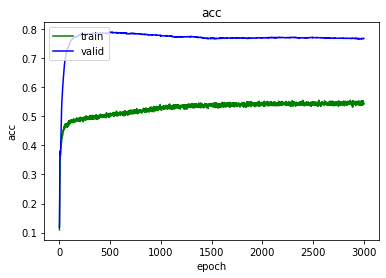

正解数/入力数:3805/4959
正解率:0.767
                     Car  Emergency vehicle   Music  Animal
Car                817.0               83.0   142.0   143.0
Emergency vehicle   56.0              402.0    78.0    39.0
Music               47.0               37.0  1356.0   160.0
Animal              78.0               54.0   237.0  1230.0


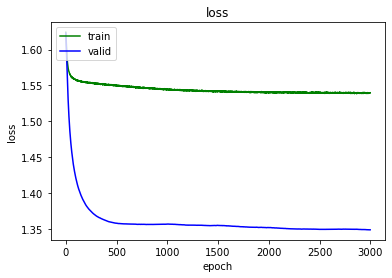

In [6]:
mymodel.graph()

mymodel.eval(dataloader_dict)
mymodel.getKondou()

In [7]:
mymodel.saveModel(addname="aaa")

tensor([1, 1, 3, 0, 1, 2, 3, 0, 1, 4]) tensor([[0.0919, 0.2580, 0.2334, 0.1538, 0.0932, 0.0605, 0.1090],
        [0.2619, 0.2304, 0.1652, 0.1001, 0.0516, 0.0762, 0.1147],
        [0.1217, 0.1003, 0.1359, 0.3603, 0.0960, 0.0818, 0.1040],
        [0.3573, 0.1500, 0.1479, 0.1109, 0.0488, 0.0812, 0.1039],
        [0.1106, 0.4515, 0.1462, 0.0915, 0.0352, 0.0548, 0.1101],
        [0.1169, 0.0790, 0.5239, 0.0817, 0.0654, 0.0522, 0.0809],
        [0.2103, 0.1199, 0.3552, 0.0888, 0.0667, 0.0645, 0.0946],
        [0.3798, 0.1817, 0.1456, 0.0719, 0.0413, 0.0785, 0.1012],
        [0.0980, 0.3569, 0.1818, 0.1362, 0.0483, 0.0606, 0.1181],
        [0.1018, 0.1014, 0.3232, 0.1889, 0.1207, 0.0641, 0.0999]],
       device='cuda:0', grad_fn=<SoftmaxBackward>)


ValueError: only one element tensors can be converted to Python scalars

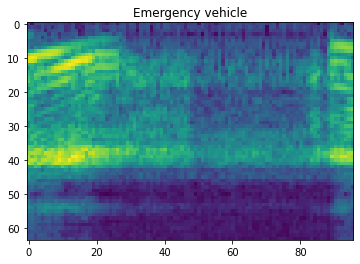

In [8]:
from pathlib import Path
model=mymodel.model
model.eval()
DIR=Path().resolve()
count=0
os.makedirs(os.path.join(DIR,"acc"),exist_ok=True)
os.makedirs(os.path.join(DIR,"bat"),exist_ok=True)
for inputs,la in dataloader_dict["valid"]:
    outputs=model(inputs)
    print(la,outputs)
    for i in range(len(inputs)):
        fig=plt.figure()
        plt.imshow(inputs[i][0].to('cpu').detach().numpy().copy().T)
        plt.title(labels[int(la[i])])
        isans='acc' if labels[int(la[i])]==labels[int(outputs[i])] else 'bat'
        filepath=os.path.join(DIR,isans,str(count)+".png")
        count+=1
        fig.savefig(filepath)

In [19]:
torch.save(mymodel.model,"mylibs/models/CarSirenSpeechotherMusicAnimal.pth")

In [ ]:
Sequential0Linearin_features=128out_features=64bias=True1Dropoutp=0.5inplace=False2Sigmoid3Linearin_features=64out_features=4bias=True4Softmaxdim=11201500datasotherMusicAnimal.pthCarCivildefensesirenPolicecarsirenFireenginefiretrucksirenMusicAnimalSpeechSequential0Linearin_features=128out_features=64bias=True1Dropoutp=0.5inplace=False2Sigmoid3Linearin_features=64out_features=7bias=True4Softmaxdim=1

In [4]:
mymodel.model=torch.load("mylibs/models/CarSirenSpeechotherMusicAnimal.pth")

In [5]:
mymodel.eval(dataloader_dict)
mymodel.getKondou()

正解数/入力数:1234/2300
正解率:0.537
                                   Car  Civil defense siren  \
Car                              157.0                 53.0   
Civil defense siren                8.0                175.0   
Police car (siren)                 6.0                 21.0   
Fire engine, fire truck (siren)   14.0                 37.0   
Music                              3.0                 13.0   
Animal                             1.0                 13.0   
Speech                             9.0                  7.0   

                                 Police car (siren)  \
Car                                             1.0   
Civil defense siren                             0.0   
Police car (siren)                              2.0   
Fire engine, fire truck (siren)                 1.0   
Music                                           0.0   
Animal                                          1.0   
Speech                                          0.0   

                          

In [18]:
t

TypeError: eval() missing 1 required positional argument: 'dataloader_dict'